In [2]:
from IPython.display import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Lineare Regression
In der nachfolgenden Zelle werden zuerst Daten geladen, die zur Veranschaulichung der linearen Regression dienen.
Anschliessend wird ein lineares Modell mit Hilfe der der Klasse Lineare Regression aus `sklearn.linear_model` gerechnet. Die Vorhersage (d.h. die Geradengleichung) ergibt sich aus den Koeffizienten durch<br>

$$y = a + bX$$

In [2]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
y = np.load('/home/martin/python/fhnw_lecture/scripts/regression_y.pickle.npy')
X = np.load('/home/martin/python/fhnw_lecture/scripts/regression_X.pickle.npy')
model = LinearRegression()
model.fit(X, y)
y_hat = model.coef_ * X + model.intercept_

A prediction is always marked with a '^' (a hat); $y$ is the observed target, $\hat{y}$ is the predicted value.

Warum wird für $\mathbf{X}$ immer ein Grossbuchstabe verwendet und für $\mathbf{y}$ ein kleiner Buchstabe?
Die Matrix der Variablen $\mathbf{X}$ wird gross geschrieben, da in Matrix-Notation Matrizen immer mit grossen Buchstaben bezeichnet werden, Vektoren - so wie die abhängige Variable $\mathbf{y}$ - werden mit kleinen Buchstaben benannt.


```{sidebar} Warum wird für $\mathbf{X}$ immer ein Grossbuchstabe verwendet und für $\mathbf{y}$ ein kleiner Buchstabe ?
Die Matrix der Variablen $\mathbf{X}$ wird gross geschrieben, da in Matrix-Notation Matrizen immer mit grossen Buchstaben bezeichnet werden, Vektoren - so wie die abhängige Variable $\mathbf{y}$ - werden mit kleinen Buchstaben benannt.
```

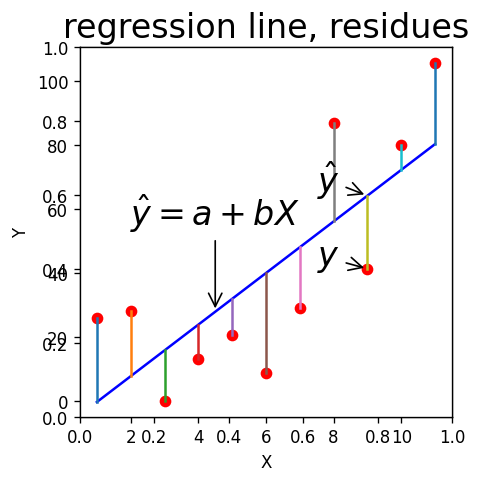

In [3]:
f = plt.figure(figsize=(4, 4), dpi=120)

plt.title(label='regression line, residues', fontdict={'fontsize':20})
axes = f.add_subplot(111)
# plot(recall, precision, marker='.',linestyle='--', label='conformal set')
# axes.plot(X, y, 'ro', X, y_hat)
axes.plot(X, y, 'ro')
axes.plot(X, y_hat, 'b-')
# axes.tick_params(left=False, labelleft=False, top=False, labeltop=False, right=False, labelright=False, bottom=False, labelbottom=False)
#axes = plt.gca()
axes.set_ylim([np.min(y)-5, np.max(y) +5])
for i in range(len(y)):
    plt.plot((X[i, 0], X[i, 0]), (y[i], y_hat[i]))

axes.set_xlabel('X') 
axes.set_ylabel('Y')

axes.annotate('$y$', xy=(X[-3, 0], y[-3, 0]), xycoords='data',
            xytext=(X[-3, 0] - 1.5, y[-3, 0] + 1), textcoords='data',
            size = 20, arrowprops=dict(arrowstyle="->"))

axes.annotate('$\hat{y}$', xy=(X[-3, 0], y_hat[-3, 0]), xycoords='data',
            xytext=(X[-3, 0] - 1.5, y_hat[-3, 0] + 1), textcoords='data',
            size = 20, arrowprops=dict(arrowstyle="->"))

axes.annotate('$\hat{y} = a + bX$', xy=(X[3, 0] + 0.5, model.coef_ * (X[3, 0] + 0.5) + model.intercept_),
              xycoords='data', xytext=(X[3, 0] + 0.5, 55), textcoords='data',
              horizontalalignment = 'center',
              size = 20, arrowprops=dict(arrowstyle="->"))
plt.show()

#plt.close('all')

__Residuen__<br>

Der Plot zeigt die berechnete Regressionsgerade, sowie die Abweichungen (die Fehler) der wirklichen Messwerte von dieser Geraden. Diese Abweichungen werden als __Residuen__ bezeichnet, weil es der Anteil der gemessenen Werte ist, der “übrig bleibt”, d.h. nicht durch das Modell erklärt werden kann.<br>
Vorhergesagte Variablen werden meist mit einem Dach (Hut) bezeichnet, so wie $\hat{y}$.

```{sidebar} Residuen
Der Plot zeigt die berechnete Regressionsgerade, sowie die Abweichungen (die Fehler) der wirklichen Messwerte von dieser Geraden. Diese Abweichungen werden als __Residuen__ bezeichnet, weil es der Anteil der gemessenen Werte ist, der “übrig bleibt”, d.h. nicht durch das Modell erklärt werden kann.<br>
Vorhergesagte Variablen werden meist mit einem Dach (Hut) bezeichnet, sowie $\hat{y}$.
```

## Analytische Herleitung der Parameter der Linearen Regression

Allgemein kann man den Nullpunkt einer quadratischen Funktion bestimmen, indem man ihre erste Ableitung gleich $0$ setzt. Die erste Ableitung gibt die Steigung der Funktion an. In der Physik ist dies oft die Geschwindigkeit. Die Steigung ist am Minimum der Funktion schliesslich $0$. Man beachte, dass quadratische Funktionen immer nur einen Maximalwert haben können.

Nachfolgend ist dieser Sachverhalt für die quadratische Funktion $f(x) = (x-1)^2$ dargestellt. Die Ableitung
$2x-2$ ist ebenfalls eingetragen. Bei dem Minimum der Funktion ist die erste Ableitung gleich $0$ (die Stelle an der der Funktionsgraph, der der ersten Ableitung und die rote, horizontale Linie sich schneiden).

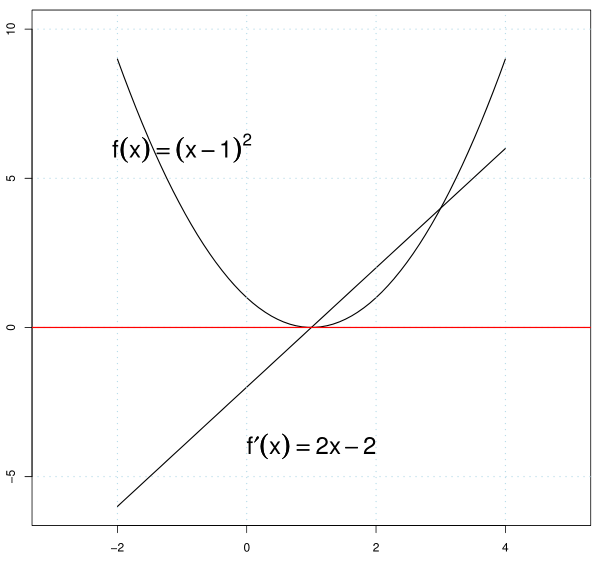

In [4]:
Image('../images/first_derivative.png', height= 280, width=280)
# <img alt="taken from homepage of 20 newsgroups" caption="The different categories of the newsgroup posts" 
# id="20_newsgroups" src="../images/first_derivative.png" width="320" height="320">

Die Parameter einer linearen Regression können analytisch berechnet werden. Dazu wird der quadrierte Fehler $(y_i-\hat{y}_i)^2$ über alle Messwerte aufsummiert. Diese Summe wird nach den Parametern abgeleitet und gleich $0$ gesetzt. Somit erhält man die Stelle an der die quadratische Funktion keine Steigung (erste Ableitung ist Steigung) hat. Weil eine quadratische Funktion als einzige Nullstelle der Steigung ein Minimum hat, erhalten wir somit die Parameter an dem Minimum unserer quadratischen Fehlerfunktion.

__derivative of the error term__ $(y - \hat{y})^2$ __with respect to the parameters__ $b$ __and__ $a$<br>
* für $\hat{y}$ können wir auch schreiben: $a + b\cdot x$, dies ist die Vorhersage mit Hilfe der Regression-Gerade (der Geraden-Gleichung):<br>
$$\sum_i^{n}(y_i - \hat{y_i})^2 = \sum_i^{n}[y_i - (a + b\cdot x_i)]^{2}$$

* wir leiten diese Fehler-Funktion nach $a$ ab und setzen diese erste Ableitung gleich $0$ (Hierbei wird die Kettenregel verwendet):
\begin{align*}
\frac{\delta \sum_i^{n}(y_i - \hat{y_i})^2}{\delta a} = -2\sum_i^{n}y_i + 2b\sum_i^{n}x_i + 2na =& 0\\
2na =& 2\sum_i^{n}y_i - 2b\sum_i^{n}x_i\\
  a =& \frac{2\sum_i^{n}y_i}{2n} - \frac{2b\sum_i^{n}x_i}{2n}
\end{align*}
* die Summe über alle $x_i$ geteilt durch $n$ -- die Anzahl aller Beobachtungen -- ergibt den Mittelwert $\bar{x}$, gleiches gilt für $\bar{y}$:

$$a = \bar{y} - b\bar{x}$$

````{sidebar} Optimization I: univariate case
```{epigraph}
__derivative of the error term__ $(y - \hat{y})^2$ __with respect to the parameters__ $b$ __and__ $a$

* für $\hat{y}$ können wir auch schreiben: $a + b\cdot x$, dies ist die Vorhersage mit Hilfe der Regression-Gerade (der Geraden-Gleichung):

$$\sum_i^{n}(y_i - \hat{y_i})^2 = \sum_i^{n}[y_i - (a + b\cdot x_i)]^{2}$$

* wir leiten diese Fehler-Funktion nach $a$ ab und setzen diese erste Ableitung gleich $0$ (Hierbei wird die Kettenregel verwendet):
\begin{align*}
\frac{\delta \sum_i^{n}(y_i - \hat{y_i})^2}{\delta a} = -2\sum_i^{n}y_i + 2b\sum_i^{n}x_i + 2na =& 0\\
2na =& 2\sum_i^{n}y_i - 2b\sum_i^{n}x_i\\
  a =& \frac{2\sum_i^{n}y_i}{2n} - \frac{2b\sum_i^{n}x_i}{2n}
\end{align*}

* die Summe über alle $x_i$ geteilt durch $n$ -- die Anzahl aller Beobachtungen -- ergibt den Mittelwert $\bar{x}$, gleiches gilt für $\bar{y}$:

$$a = \bar{y} - b\bar{x}$$
```
````

* die Lösung für $b$ ergibt sich analog; hier ersetzen wir $a$ mit obigen Ergebnis und erhalten:<br>

<br>


$$ b = \frac{\frac{1}{n}\sum_i^n(x_i - \bar{x})(y_i - \bar{y})}{\frac{1}{n}\sum_i^n (x_i - \bar{x})^2} = 
\frac{\text{cov}_{xy}}{\text{var}_x}$$

* Vereinfacht ist die Formel: Kovarianz der beiden Variablen $x$ und $y$ geteilt durch die Varianz von $x$.


Nachfolgend wird demonstriert, wie die hergeleiteten Formeln, in python angewendet dieselben Parameter-Schätzer ergeben wie die aus der Klasse `LineareRegression` aus `sklearn.linear_model`. Dies soll einfach nur demonstrieren, dass die alles ganz leicht zu rechnen ist und keiner komplizierten Algorithmen bedarf.


````{sidebar} Optimization I: univariate case
```{epigraph}
* die Lösung für $b$ ergibt sich analog; hier ersetzen wir $a$ mit obigen Ergebnis und erhalten:

$$ b = \frac{\frac{1}{n}\sum_i^n(x_i - \bar{x})(y_i - \bar{y})}{\frac{1}{n}\sum_i^n (x_i - \bar{x})^2} = 
\frac{\text{cov}_{xy}}{\text{var}_x}$$

* Vereinfacht ist die Formel: Kovarianz der beiden Variablen $x$ und $y$ geteilt durch die Varianz von $x$.
```
````


Nachfolgend wird demonstriert, wie die hergeleiteten Formeln, in python angewendet dieselben Parameter-Schätzer ergeben wie die aus der Klasse `LineareRegression` aus `sklearn.linear_model`. Dies soll einfach nur demonstrieren, dass die alles ganz leicht zu rechnen ist und keiner komplizierten Algorithmen bedarf.


In [5]:
# we can easily verify these results
print(f'the parameter b is the coefficient of the linear model {model.coef_}')
print(f"""the parameter a is called the intercept of the model because it indicates\n 
      where the regression line intercepts the y-axis at x=0 {model.intercept_}""")

cov_xy =(1/X.shape[0]) * np.dot((X - np.mean(X)).T,y - np.mean(y))[0][0]
var_x = (1/X.shape[0]) * np.dot((X - np.mean(X)).T,X - np.mean(X))[0][0]
b = cov_xy/var_x
a = np.mean(y)-b*np.mean(X)
print(f'\nour self-computed b parameter is: {b}')
print(f'our self-computed a parameter is: {a}')

the parameter b is the coefficient of the linear model [[8.07912445]]
the parameter a is called the intercept of the model because it indicates
 
      where the regression line intercepts the y-axis at x=0 [-8.49032154]

our self-computed b parameter is: 8.079124453577007
our self-computed a parameter is: -8.490321540681805


## multivariate case: more than one x variable
Für Multivariate Lineare Regression kann die Schreibweise mit Matrizen zusammengefasst werden. Dafür kann es lohnend sein, sich die Matrizen-Multiplikation noch einmal kurz anzusehen. 


\begin{align*}
    y_1&=a+b_1\cdot x_{11}+b_2\cdot x_{21}+\cdots + b_p\cdot x_{p1}\\
    y_2&=a+b_1\cdot x_{12}+b_2\cdot x_{22}+\cdots + b_p\cdot x_{p2}\\
    \ldots& \ldots\\
    y_i&=a+b_1\cdot x_{1i}+b_2\cdot x_{2i}+\cdots + b_p\cdot x_{pi}\\
\end{align*}

\begin{equation*}
    \begin{bmatrix}
      y_1\\
      y_2\\
      .  \\
      .  \\
      .  \\
      y_i
    \end{bmatrix}
    = a+
    \begin{bmatrix}
      x_{11} & x_{21} & x_{31} & \ldots & x_{p1}\\
      x_{12} & x_{22} & x_{32} & \ldots & x_{p2}\\
      \ldots&\ldots&\ldots&\ldots&\ldots\\
      \ldots&\ldots&\ldots&\ldots&\ldots\\
      \ldots&\ldots&\ldots&\ldots&\ldots\\
      x_{1i} & x_{2i} & x_{3i} & \ldots & x_{pi}\\
    \end{bmatrix}
    \cdot
    \begin{bmatrix}
 b_1\\
      b_2\\
      .\\
      .\\
      .\\
      b_p
    \end{bmatrix}
\end{equation*}

Den konstanten intercept Term ($a$) können wir mit in den Vektor der Parameter $\mathbf{b}$ aufnehmen, indem wir in $\mathbf{X}$ eine Einser-Spalte hinzufügen. Somit wird die Schreibweise sehr kompakt und der intercept $a$ wird nicht mehr explizit aufgeführt:   

\begin{equation*}
     \begin{bmatrix}
      y_1\\
      y_2\\
      .  \\
      .  \\
      .  \\
      y_i
    \end{bmatrix}
    =
    \begin{bmatrix}
      1& x_{11} & x_{21} & x_{31} & \ldots & x_{p1}\\
      1 &  x_{12} & x_{22} & x_{32} & \ldots & x_{p2}\\
      &\ldots&\ldots&\ldots&\ldots&\ldots\\
      &\ldots&\ldots&\ldots&\ldots&\ldots\\
      1& x_{1i} & x_{2i} & x_{3i} & \ldots & x_{pi}
    \end{bmatrix}
    \cdot
    \begin{bmatrix}
      a\\
      b_1\\
      b_2\\
      .\\
      .\\
      b_p
    \end{bmatrix}
  \end{equation*}
  
In Matrizen-Schreibweise können wir jetzt einfach schreiben:
$\mathbf{y} = \mathbf{X}\mathbf{b}$

Anschliessend wird die Berechnung der Parameter der Multivariaten Regression in Matrizen-Schreibweise erläutert.  Konzeptionell ist dies nicht vom univariaten Fall verschieden. Diese Formel wird nur hergeleitet um demonstrieren zu können, wie das Ergebnis der expliziten Berechnung in Python mit dem aus der sklearn Klasse `LinearRegression`  übereinstimmt. 



* we expand the error term:

  \begin{align*}
    \text{min}=&(\mathbf{y}-\hat{\mathbf{y}})^2=(\mathbf{y}-\mathbf{X}\mathbf{b})'(\mathbf{y}-\mathbf{X}\mathbf{b})=\\
    &(\mathbf{y}'-\mathbf{b}'\mathbf{X}')(\mathbf{y}-\mathbf{X}\mathbf{b})=\\
    &\mathbf{y}'\mathbf{y}-\mathbf{b}'\mathbf{X}'\mathbf{y}-\mathbf{y}'
    \mathbf{X}\mathbf{b}+\mathbf{b}'\mathbf{X}'\mathbf{X}\mathbf{b}=\\
    &\mathbf{y}'\mathbf{y}-2\mathbf{b}'\mathbf{X}'\mathbf{y}+\mathbf{b}'\mathbf{X}'
    \mathbf{X}\mathbf{b}\\
  \end{align*}
 
 
* derivative of the error term with respect to $\mathbf{b}$
* we set the result equal to zero and solve for $\mathbf{b}$


Anschliessend wird die Berechnung der Parameter der Multivariaten Regression in Matrizen-Schreibweise erläutert.  Konzeptionell ist dies nicht vom univariaten Fall verschieden. Diese Formel wird nur hergeleitet um demonstrieren zu können, wie das Ergebnis der expliziten Berechnung in Python mit dem aus der sklearn Klasse `LinearRegression`  übereinstimmt. 

````{sidebar} Optimization I: multivariate case
```{epigraph}

* we expand the error term:

  \begin{align*}
    \text{min}=&(\mathbf{y}-\hat{\mathbf{y}})^2=(\mathbf{y}-\mathbf{X}\mathbf{b})'(\mathbf{y}-\mathbf{X}\mathbf{b})=\\
    &(\mathbf{y}'-\mathbf{b}'\mathbf{X}')(\mathbf{y}-\mathbf{X}\mathbf{b})=\\
    &\mathbf{y}'\mathbf{y}-\mathbf{b}'\mathbf{X}'\mathbf{y}-\mathbf{y}'
    \mathbf{X}\mathbf{b}+\mathbf{b}'\mathbf{X}'\mathbf{X}\mathbf{b}=\\
    &\mathbf{y}'\mathbf{y}-2\mathbf{b}'\mathbf{X}'\mathbf{y}+\mathbf{b}'\mathbf{X}'
    \mathbf{X}\mathbf{b}\\
  \end{align*}
 
 
* derivative of the error term with respect to $\mathbf{b}$
* we set the result equal to zero and solve for $\mathbf{b}$
```
````

\begin{align*}
    \frac{\delta}{\delta
      \mathbf{b}}=&-2\mathbf{X}'\mathbf{y}+2\mathbf{X}'\mathbf{X}\mathbf{b}=0\\
    2\mathbf{X}'\mathbf{X}\mathbf{b}=&2\mathbf{X}'\mathbf{y}\\
    \mathbf{b}=&(\mathbf{X}'\mathbf{X})^{-1}\mathbf{X}'\mathbf{y}\quad
  \end{align*}

  
Hierbei bedarf es der Inversion des Kreuzproduktes der Variablen-Matrix $(\mathbf{X}'\mathbf{X})^{-1}$. Die Matrizen-Inversion ist für grosse Anzahl von Variablen mathematisch sehr aufwändig und kann unter Umständen zu Ungenauigkeiten führen. In der Vergangenheit wurde viel an Algorithmen geforscht um die Inversion schneller und stabiler zu machen. Oftmals stehen Fehlermeldungen in Zusammenhang mit diesem Berechnungsschritt.

````{sidebar} Optimiztaion I: multivariate case
```{epigraph}
\begin{align*}
    \frac{\delta}{\delta
      \mathbf{b}}=&-2\mathbf{X}'\mathbf{y}+2\mathbf{X}'\mathbf{X}\mathbf{b}=0\\
    2\mathbf{X}'\mathbf{X}\mathbf{b}=&2\mathbf{X}'\mathbf{y}\\
    \mathbf{b}=&(\mathbf{X}'\mathbf{X})^{-1}\mathbf{X}'\mathbf{y}\quad
  \end{align*}
```  
````
  
Hierbei bedarf es der Inversion des Kreuzproduktes der Variablen-Matrix $(\mathbf{X}'\mathbf{X})^{-1}$. Die Matrizen-Inversion ist für grosse Anzahl von Variablen mathematisch sehr aufwändig und kann unter Umständen zu Ungenauigkeiten führen. In der Vergangenheit wurde viel an Algorithmen geforscht um die Inversion schneller und stabiler zu machen. Oftmals stehen Fehlermeldungen in Zusammenhang mit diesem Berechnungsschritt.

## Polynomial regression as an example for more than one variable
Um einfach Multivariate Lineare Regression an einem Beispiel zeigen zu können wird die quadratische Regression (ein Spezial-Fall der Multivariaten Regression) eingeführt. Eine neue Variable entsteht durch das Quadrieren der bisherigen univiaraten Variable x. Das Praktische ist, dass sich der Sachverhalt der Multivariaten Regression noch immer sehr schön 2-dimensional darstellen lässt.<br> 

$$y = a + b_1 x + b_2 x^2$$


__Hier ist zu beachten__<br>

* wir haben jetzt zwei Variablen und können folglich unsere Formel in Matrizen-Schreibweise anwenden
* mehr Variablen führen hoffentlich zu einem besseren Modell
* durch den quadratischen Term ist die resultierende Regressions-Funktion keine Gerade mehr.<br>
__Der Ausdruck "linear" in Linearer Regression bedeutet dass die Funktion linear in den Parametern
 $a, \mathbf{b}_\mathbf{1}, \mathbf{b}_\mathbf{2}$ ist. Für alle Werte einer Variablen $\mathbf{x_1}$ gilt der gleiche Parameter $\mathbf{b_1}$.<br>
Es bedeutet nicht, dass die Regressions-Funktion durch eine gerade Linie gegeben ist!__
* ausserdem bedienen wir uns hier eines Tricks: Die Variable $x^2$ müsste eigentlich eine eigene Achse bekommen. Dann wäre die Regressions-Gerade wieder eine gerade Linie - nur lässt sich das leider nicht mehr schön darstellen.


Nachfolgend fügen wir die weitere Variable durch Quadrieren der bisherigen Variable hinzu und berechnen abermals das Lineare Modell aus `sklearn.linear_model`.

## Polynomial regression as an example for more than one variable
Um einfach Multivariate Lineare Regression an einem Beispiel zeigen zu können wird die quadratische Regression (ein Spezial-Fall der Multivariaten Regression) eingeführt. Eine neue Variable entsteht durch das Quadrieren der bisherigen univiaraten Variable x. Das Praktische ist, dass sich der Sachverhalt der Multivariaten Regression noch immer sehr schön 2-dimensional darstellen lässt.<br> 

$$y = a + b_1 x + b_2 x^2$$


```{sidebar} Hier ist zu beachten
* wir haben jetzt zwei Variablen und können folglich unsere Formel in Matrizen-Schreibweise anwenden
* mehr Variablen führen hoffentlich zu einem besseren Modell
* durch den quadratischen Term ist die resultierende Regressions-Funktion keine Gerade mehr.<br>
__Der Ausdruck "linear" in Linearer Regression bedeutet dass die Funktion linear in den Parametern
 $a, \mathbf{b}_\mathbf{1}, \mathbf{b}_\mathbf{2}$ ist. Für alle Werte einer Variablen $\mathbf{x_1}$ gilt der gleiche Parameter $\mathbf{b_1}$.<br>
Es bedeutet nicht, dass die Regressions-Funktion durch eine gerade Linie gegeben ist!__
* ausserdem bedienen wir uns hier eines Tricks: Die Variable $x^2$ müsste eigentlich eine eigene Achse bekommen. Dann wäre die Regressions-Gerade wieder eine gerade Linie - nur lässt sich das leider nicht mehr schön darstellen.
````

Nachfolgend fügen wir die weitere Variable durch Quadrieren der bisherigen Variable hinzu und berechnen abermals das Lineare Modell aus `sklearn.linear_model`.

In [6]:
from numpy.linalg import inv
# polynomial
y = np.load('/home/martin/python/fhnw_lecture/scripts/regression_y.pickle.npy')
X = np.load('/home/martin/python/fhnw_lecture/scripts/regression_X.pickle.npy')
# 
X = np.c_[X, X**2]

# the x (small x) is just for plotting purpose
x = np.arange(-1, 12, 0.05).reshape((-1, 1))
x = np.c_[x, x**2]

model.fit(X, y)
y_hat = np.dot(x , model.coef_.T)  + model.intercept_

(-5.0, 110.77315979942053)

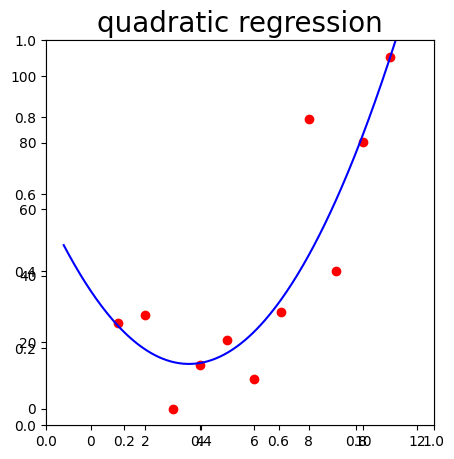

In [7]:
f = plt.figure(figsize=(5, 5), dpi=100)
plt.title(label='quadratic regression', fontdict={'fontsize':20})
axes = f.add_subplot(111)
# axes.tick_params(left=False, labelleft=False, top=False, labeltop=False, right=False, labelright=False, bottom=False, labelbottom=False)
#axes.plot(X[:,0], y, 'ro', x[:,0], y_hat.reshape((-1,)))
axes.plot(X[:,0], y, 'ro')
axes.plot(x[:,0], y_hat.reshape((-1,)), 'b-')
#axes = plt.gca()
axes.set_ylim([np.min(y)-5, np.max(y) +5])

Jetzt berechnen wir die Parameter der Multiplen Linearen Regression mit Hilfe der hergeleiteten Formeln. Hierfür fügen wir zu den bisherigen Variablen $x$ und $x^2$ noch eine Einser-Spalte für den intercpet ein. `np.dot` berechnet das dot-product zweier Variablen. Um das Kreuzprodukt von $\mathbf{X}$ berechnen zu können, muss eine der beiden Matrizen transponiert werden. 

  - `.T` transponiert eine Matrix <br>

  - `inv` invertiert das Kreuzprodukt <br>

  - `coefs = np.dot(np.dot(inv(np.dot(X_intercept.T,X_intercept)),X_intercept.T),y)` ist gleichbedeutend mit:<br>
  

\begin{equation*}
\mathbf{b}=(\mathbf{X}'\mathbf{X})^{-1}\mathbf{X}'\mathbf{y}
\end{equation*}


In [8]:
# again we can compare the parameters of the model with those resulting from 
# our derived equation:
# b=(X'X)^{-1} X'y
from numpy.linalg import inv

# first we have to add the intercept into our X-Variable; we rename it X_intercept
X_intercept = np.c_[np.ones(X.shape[0]), X]
coefs = np.dot(np.dot(inv(np.dot(X_intercept.T,X_intercept)),X_intercept.T),y)
print(f'the parameter b is the coefficient of the linear model {model.coef_}')
print(f'the parameter a is called the intercept of the model because it indicates\n where the regression line intercepts the y-axis at x=0 {model.intercept_}')

print(f'our coefs already include the intercept: {coefs}')
print(f'the vector norm is {np.linalg.norm(np.c_[model.intercept_, model.coef_])}')

the parameter b is the coefficient of the linear model [[-12.14930516   1.68570247]]
the parameter a is called the intercept of the model because it indicates
 where the regression line intercepts the y-axis at x=0 [35.33794262]
our coefs already include the intercept: [[ 35.33794262]
 [-12.14930516]
 [  1.68570247]]
the vector norm is 37.406114431545056


### Overfitting

Nun wird diese Vorgehensweise für weitere Terme höherer Ordnung angewendet. Graphisch lässt sich zeigen, dass die Anpassung des Modells an die Daten immer besser wird, die Vorhersage für __neue Datenpunkte__ aber sehr schlecht sein dürfte. Man sagt dann, das Model __"generalisiert"__ sehr schlecht. Das Polynom hat an vielen Stellen Schlenker und absurde Kurven eingebaut. Dies ist ein erstes Beispiel für __“overfitting”__.<br>  
Einen ‘perfekten’ fit erhält man, wenn man genau so viele Paramter (10 Steigunskoeffizienten + intercept) hat wie Daten-Messpunkte.<br>


__The important points to note here__<br>

* the fit to our empirical y-values gets better
* at the same time, the regression line starts behaving strangly
* the predictions made by the regression line in between the empirical y-values are grossly wrong: this is an example of __overfitting__


### Overfitting

Nun wird diese Vorgehensweise für weitere Terme höherer Ordnung angewendet. Graphisch lässt sich zeigen, dass die Anpassung des Modells an die Daten immer besser wird, die Vorhersage für __neue Datenpunkte__ aber sehr schlecht sein dürfte. Man sagt dann, das Model __"generalisiert"__ sehr schlecht. Das Polynom hat an vielen Stellen Schlenker und absurde Kurven eingebaut. Dies ist ein erstes Beispiel für __“overfitting”__.<br>  
Einen ‘perfekten’ fit erhält man, wenn man genau so viele Paramter (10 Steigunskoeffizienten + intercept) hat wie Daten-Messpunkte. 


```{sidebar} The important points to note here
* the fit to our empirical y-values gets better
* at the same time, the regression line starts behaving strangly
* the predictions made by the regression line in between the empirical y-values are grossly wrong: this is an example of __overfitting__
```

In [9]:
y = np.load('/home/martin/python/fhnw_lecture/scripts/regression_y.pickle.npy')
X = np.load('/home/martin/python/fhnw_lecture/scripts/regression_X.pickle.npy')
# 
X = np.c_[X, X**2, X**3, X**4, X**5, X**6, X**7, X**8, X**9]
x = np.arange(-1, 12, 0.05).reshape((-1, 1))
x = np.c_[x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9]
model.fit(X, y)
y_hat = np.dot(x , model.coef_.T)  + model.intercept_
print(f'the vector norm is {np.linalg.norm(np.c_[model.intercept_, model.coef_])}')

the vector norm is 10291.183588958447


(-10.0, 115.77315979942053)

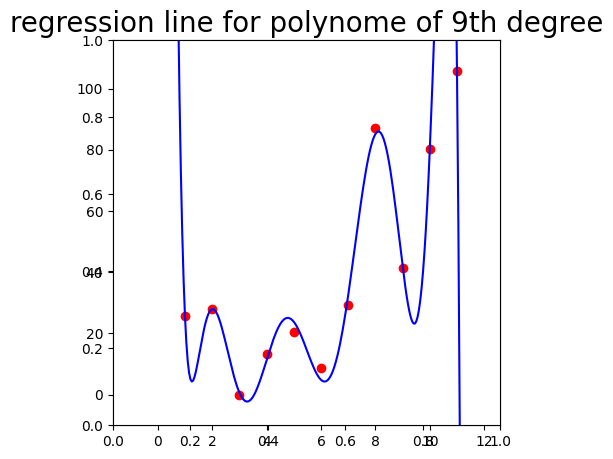

In [10]:
f = plt.figure(figsize=(5, 5), dpi=100)
plt.title(label='regression line for polynome of 9th degree', fontdict={'fontsize':20})
axes = f.add_subplot(111)
# axes.tick_params(left=False, labelleft=False, top=False, labeltop=False, right=False, labelright=False, bottom=False, labelbottom=False)
# axes.plot(X[:,0], y, 'ro', x[:,0], y_hat.reshape((-1,)))
axes.plot(X[:,0], y, 'ro')
axes.plot(x[:,0], y_hat.reshape((-1,)), 'b-')
#axes = plt.gca()
axes.set_ylim([np.min(y)-10, np.max(y) +10])

### perfect fit: as many variables as data samples
A perfect fit is possible as is demonstrated next. We have as many variables (terms derived from x) as observations (data points). So for each data point we have a variable to accommodate it.<br>
__Note__,<br>

that a perfect fit is achieved with 10 variables + intercept. The intercept is also a parameter and in this case the number of observations $n$ equals the number of variables $p$, i.e. $p=n$.


### perfect fit: as many variables as data samples
A perfect fit is possible as is demonstrated next. We have as many variables (terms derived from x) as observations (data points). So for each data point we have a variable to accommodate it.<br>
```{sidebar} Note, 
that a perfect fit is achieved with 10 variables + intercept. The intercept is also a parameter and in this case the number of observations $n$ equals the number of variables $p$, i.e. $p=n$.
```

In [11]:
y = np.load('/home/martin/python/fhnw_lecture/scripts/regression_y.pickle.npy')
X = np.load('/home/martin/python/fhnw_lecture/scripts/regression_X.pickle.npy')
# 
X = np.c_[X, X**2, X**3, X**4, X**5, X**6, X**7, X**8, X**9, X**10]
x = np.arange(-1, 12, 0.05).reshape((-1, 1))
x = np.c_[x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9, x**10]
model.fit(X, y)
y_hat = np.dot(x , model.coef_.T)  + model.intercept_

In [12]:
print(f'the intercept and the coefficients are: {model.intercept_}, {model.coef_}')
print(f'the vector norm is {np.linalg.norm(np.c_[model.intercept_, model.coef_])}')

the intercept and the coefficients are: [-3441.39312684], [[ 9.78850247e+03 -1.13028947e+04  7.22274972e+03 -2.87529941e+03
   7.50866173e+02 -1.30676129e+02  1.49834538e+01 -1.08409739e+00
   4.47396934e-02 -8.00881034e-04]]
the vector norm is 17217.14141110417


(-10.0, 125.77315979942053)

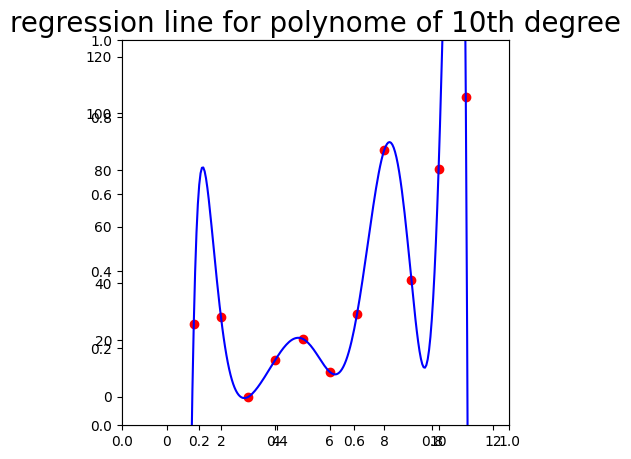

In [13]:
f = plt.figure(figsize=(5, 5), dpi=100)
plt.title(label='regression line for polynome of 10th degree', fontdict={'fontsize':20})
axes = f.add_subplot(111)
# axes.tick_params(left=False, labelleft=False, top=False, labeltop=False, right=False, labelright=False, bottom=False, labelbottom=False)
# axes.plot(X[:,0], y, 'ro', x[:,0], y_hat.reshape((-1,)))
axes.plot(X[:,0], y, 'ro')
axes.plot(x[:,0], y_hat.reshape((-1,)), 'b-')
#axes = plt.gca()
axes.set_ylim([np.min(y)-10, np.max(y) +20])

## More variables than data points?

Gibt es mehr Parameter als Datenpunkte, existieren unendlich viele Lösungen und das Problem ist nicht mehr eindeutig lösbar. Früher gelang die Inversion des Kreuzproduktes der Variablen $\mathbf{X}'\mathbf{X}$ nicht. Mittlerweile gibt es Näherungsverfahren, die dennoch Ergebnisse liefern - wenn auch sehr Ungenaue.<br>
Mittlerweile gibt es aber mathematische Näherungsverfahren die es ermöglichen auch singuläre Matrizen zu invertieren.
`numpy` verwendet hierfür die sogenannte LU-decomposition.

One way to see in python that the solution is erroneous is to use the `scipy.linalg.solve` package and solve for the matix S that solves $(\mathbf{X}'\mathbf{X})^{-1} \mathbf{S} = \mathbf{I}$.<br> $\mathbf{I}$ is called the eye-matrix wih 1s in the diagonale and zeros otherwise:
$$
\mathbf{I}=\left[
\begin{array}{ccc}
   1 & \cdots & 0 \\
   \vdots & \ddots & \vdots \\
   0 & \cdots & 1
\end{array}
\right]
$$

Die entscheidende Zeile im nachfolgenden Code ist:<br>

  `S = solve(inv(np.dot(X.T, X)), np.eye(13))`

Sie besagt: gib mir die Matrix $\mathbf{S}$, die multipliziert mit $(\mathbf{X}'\mathbf{X})^{-1}$ die Matrix $\mathbf{I}$ gibt.<br>

Für unseren Fall von mehr Variablen als Beobachtungspunkten werden wir gewarnt, dass das Ergebnis falsch sein könnte. Mit älteren Mathematik- oder Statistik-Programmen ist dies überhaupt nicht möglich.

In [14]:
warnings.filterwarnings("default")
from numpy.linalg import inv
from scipy.linalg import solve
model = LinearRegression()
y = np.load('/home/martin/python/fhnw_lecture/scripts/regression_y.pickle.npy')
X = np.load('/home/martin/python/fhnw_lecture/scripts/regression_X.pickle.npy')

# underdetermined, ill-posed: infinitely many solutions
X = np.c_[X, X**2, X**3, X**4, X**5, X**6, X**7, X**8, X**9, X**10, X**11, X**12, X**13]

# this should give at least a warning, because matrix inversion as done above is not possible
# any more, due to singular covariance matrix [X'X]
model.fit(X, y)
#y_hat = np.dot(x , model.coef_.T)  + model.intercept_
S = solve(inv(np.dot(X.T, X)), np.eye(13))

/tmp/ipykernel_1230/2649073299.py:15: LinAlgWarning: Ill-conditioned matrix (rcond=3.85869e-21): result may not be accurate.
  S = solve(inv(np.dot(X.T, X)), np.eye(13))


### statistical package R
In der statistischen Programmiersprache R wird keine Warnung herausgegeben. Es werden einfach nur soviele Koeffizienten (intercept ist auch ein Koeffizient) berechnet, wie möglich ist. Alle weiteren Koeffizienten sind `NA`.

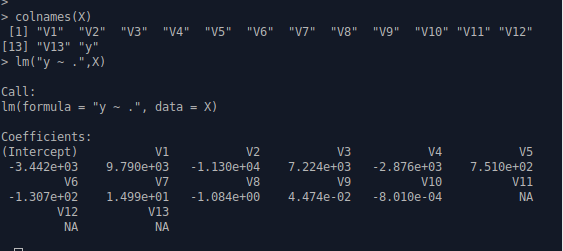

In [15]:
warnings.filterwarnings("ignore")
Image("../images/R_inverse_example.png")

## Overfitting and the Bias-Variance Tradeoff
[Wiki](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff)

  - `Bias`: Underfitting
  - `Variance`: Overfitting - the model overfits pecularities of the data sample

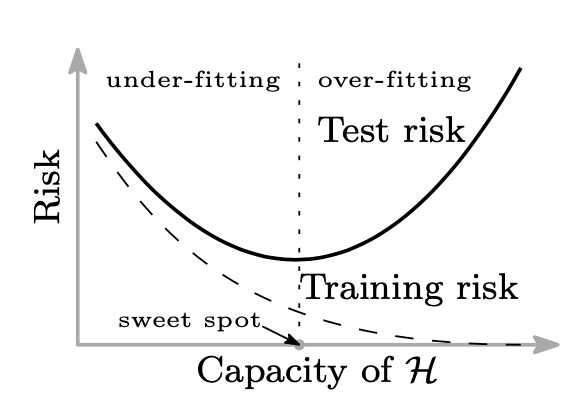

In [16]:
Image('../images/bias_variance_tradeoff.png')

__This is the perspectiv of classical statistics:__<br>

  - more parameters lead to overfitting
  - the results of models with many parameters are not reliable (due to the high variance)
  - with more parameters it's harder for single parameters to reach the significance threshold (statistical testing)
  - smaller models are better (epistemology: prefer simpler solutions if they are as good as the more complex ones)

But neural networks are heavily over-parameterized with far more weight-parameters than independent samples in the training data. How comes they generalize quite well?


__a modern perspective on overfitting__:<br>

Following [Belkin et al., 2019](https://arxiv.org/abs/1812.11118) and [Dar et al., 2021](https://arxiv.org/abs/2109.02355): 
  - When we have as many parameters as data samples, the number of solutions is very constrained. The model has to "stretch" to reach the interpolation threshold with a limited capacity. This explains the weird loops the polynomial makes.<br>
  - When we have more parameters than data points the space of interpolating solutions opens-up, actually allowing optimization to reach lower-norm interpolating solutions. These tend to generalize better, and that's why you get the second descent on test data.

(explain norm)

### This is the perspectiv of classical statistics:
```{sidebar} This is the perspectiv of classical statistics:
  - more parameters lead to overfitting
  - the results of models with many parameters are not reliable (due to the high variance)
  - with more parameters it's harder for single parameters to reach the significance threshold (statistical testing)
  - smaller models are better (epistemology: prefer simpler solutions if they are as good as the more complex ones)
````

But neural networks are heavily over-parameterized with far more weight-parameters than independent samples in the training data. How comes they generalize quite well?


```{sidebar} a modern perspective on overfitting
Following [Belkin et al., 2019](https://arxiv.org/abs/1812.11118) and [Dar et al., 2021](https://arxiv.org/abs/2109.02355): 
  - When we have as many parameters as data samples, the number of solutions is very constrained. The model has to "stretch" to reach the interpolation threshold with a limited capacity. This explains the weird loops the polynomial makes.<br>
  - When we have more parameters than data points the space of interpolating solutions opens-up, actually allowing optimization to reach lower-norm interpolating solutions. These tend to generalize better, and that's why you get the second descent on test data.
```

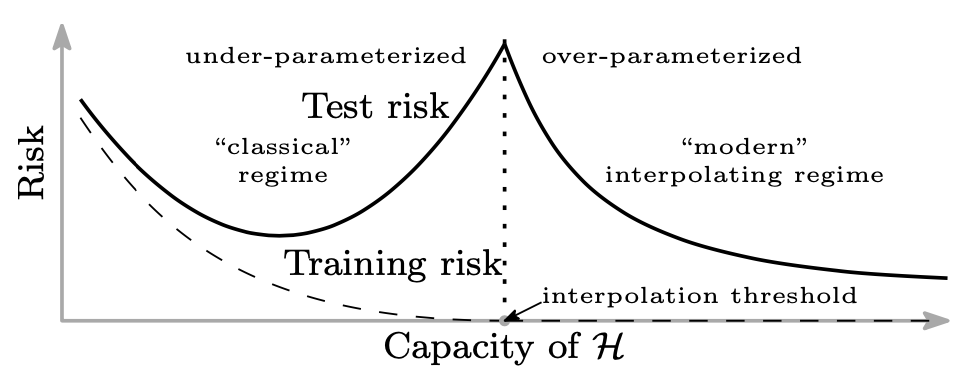

In [17]:
Image('../images/double_descent.png')

For the interested reader:
  - [On the Bias-Variance Tradeoff: Textbooks Need an Update](https://www.bradyneal.com/bias-variance-tradeoff-textbooks-update)
  - [Double Descent](https://medium.com/mlearning-ai/double-descent-8f92dfdc442f)
  - [Deep Double Descent](https://openai.com/blog/deep-double-descent/)
  - [Are Deep Neural Networks Dramatically Overfitted?](https://lilianweng.github.io/lil-log/2019/03/14/are-deep-neural-networks-dramatically-overfitted.html#modern-risk-curve-for-deep-learning)
  - [was double descent found long aog?](https://github.com/CalculatedContent/WeightWatcher-Examples/blob/main/WW_DoubleDesecent.ipynb)

# Dealing with overfitting
Wie wir gesehen haben tendiert klassische Lineare Regression zu 'overfitting' sobald es wenige Datenpunkte gibt und mehrere Koeffizienten berechnet werden. <br>
Eine Lösung für dieses Problem ist, die Koeffizienten $b_1, b_2, b_3, \ldots$ kleiner zu machen. Dies kann erreicht werden, wenn der Fehler der Regression mit grösseren Koeffizienten auch grösser wird. Um nun das Minimum der Fehlerfunktion zu finden ist ein probates Mittel, die Koeffizienten kleiner zu machen und somit implizit 'overfitting' zu verhindern.<br>
Parameter können jetzt nur noch sehr gross werden, wenn dadurch gleichzeitig der Fehler stark reduziert werden kann.

Nachfolgend wird ein Strafterm ('penalty') für grosse Parameter eingeführt. Im Falle der Ridge-Regression gehen die Koeffizienten quadriert in die Fehlerfunktion mit ein. Der Gewichtungsfaktor $\lambda$ bestimmt die Höhe des Strafterms und ist ein zusätzlicher Parameter für den -- je nach Datensatz -- ein optimaler Wert gefunden werden muss.

## Ridge regression

Remember this formula:
\begin{equation*}\sum_i^{n}(y_i - \hat{y_i})^2 = \sum_i^{n}[y_i - (a + b\cdot x_i)]^{2}\end{equation*}

To make the error term larger for extrem values of $b$, we could simply add $\lambda\cdot b^2$ to the error:

\begin{equation*}\sum_i^{n}(y_i - \hat{y_i})^2 + \lambda b^2= \sum_i^{n}[y_i - (a + b\cdot x_i)]^{2}+ \lambda b^2\end{equation*}

The parameter $\lambda$ is for scaling the amount of shrinkage.
Die beiden Ausdrücke 
\begin{equation}\sum_i^{n}[y_i - (a + b\cdot x_i)]^{2}\label{eq:fehler}\end{equation} und 
\begin{equation}\lambda b^2\label{eq:ridge_error}\end{equation} 
sind wie Antagonisten. Der Koeffizient $b$ darf nur gross werden, wenn er es vermag $\eqref{eq:fehler}$ stark zu verkleinern, so dass der Zugewinn in $\eqref{eq:fehler}$ den Strafterm in $\eqref{eq:ridge_error}$ überwiegt.




For two variables we can write:

\begin{equation*}\sum_i^{n}(y_i - \hat{y_i})^2 + \lambda b_1^2 + \lambda b_2^2= \sum_i^{n}[y_i - (a + b_1\cdot x_{i1} + b_2\cdot x_{i2})]^{2}+ \lambda b_1^2 + \lambda b_2^2\end{equation*}

And in matrix notation for an arbitrary number of variables:
\begin{align*}
    \text{min}=&(\mathbf{y}-\hat{\mathbf{y}})^2 + \lambda \mathbf{b}^2=(\mathbf{y}-\mathbf{X}\mathbf{b})'(\mathbf{y}-\mathbf{X}\mathbf{b}) + \lambda \mathbf{b}'\mathbf{b}
\end{align*}
  
  

Interessanterweise gibt es für diesen Fall ebenfalls eine exakte analytische Lösung. <br>
Allerdings haben wir den intercept Koeffizienten $a$ mit in $\mathbf{b}$ aufgenommen und die zusätzliche Spalte mit lauter Einsern in $\mathbf{X}$ hinzugefügt. Wenn wir nun $\lambda \mathbf{b}'\mathbf{b}$ berechnen, den quadrierten Strafterm für den Parametervektor, dann würden wir auch $a$ bestrafen. Die Rolle von $a$ ist aber, die Höhenlage der Regressionsfunktion zu definieren (die Stelle an der die Funktion die y-Achse schneidet).<br>
Der intercept $a$ kann allerdings aus der Gleichung genommen werden, wenn die Variablen vorher standardisiert werden (Mittelwert $\bar{x} = 0$ und $\bar{y} = 0$). Jetzt verschwindet $a$ von ganz allein, wenn wir die standardisierten Mittelwerte in die Gleichung für $a$ einfügen:<br>

\begin{equation*}
a=\bar{y} - b\bar{x} = 0 - b\cdot 0 = 0
\end{equation*}
<br>

Nun muss $a$ nicht mehr berücksichtigt werden und die Lösung für $\mathbf{b}$ ergibt sich zu:

\begin{equation*}\hat{\mathbf{b}} = (\mathbf{X}'\mathbf{X} + \lambda\mathbf{I})^{-1}\mathbf{X}'\mathbf{y}\end{equation*}

Nach [Hastie et al.](https://hastie.su.domains/Papers/ESLII.pdf), wurde dieses Verfahren ursprünglich verwendet um 'rank deficiency' Probleme zu beheben. Wenn Die Spalten oder Zeilen einer Matrix nicht linear unabhängig sind, so hat die Matrix nicht vollen Rang. Beispielsweise kann sich eine Spalte durch Addition anderer Spalten ergeben. In diesem Fall funktionierte die Matrix Inversion nicht zufriedenstellend. Als Lösung hat man gefunden, dass es ausreichend ist, einen kleinen positiven Betrag zu den Diagonal-Elementen der Matrix zu addieren.<br>

Das 'rank deficiency' Prolem wird nachfolgend in einem numerischen Beispiel gezeigt:<br>

  - `np.c_` fügt die einzelenne Variablen zu einer Matrix zusammen
  - `np.dot(X.T, X)` ist das bekannte Kreuzprodukt der transponierten Matrix $\mathbf{X'}$ und $\mathbf{X}$
  - `np.linalg.matrix_rank` gibt uns den Rang der Matrix
  - `np.eye(7) * 2` erstellt eine Diagonal-Matrix mit 2 in der Diagonalen und 0 überall sonst

In [18]:
warnings.filterwarnings("ignore")
y = np.load('/home/martin/python/fhnw_lecture/scripts/regression_y.pickle.npy')
X = np.load('/home/martin/python/fhnw_lecture/scripts/regression_X.pickle.npy')

In [19]:
X_6 = np.c_[X, X**2, X**3, X**4, X**5, X**6]
print(f'With 6 variables (polynom of 6th degree), the rank of the square matrix\n is '\
      + f'{np.linalg.matrix_rank(np.dot(X_6.T, X_6))}')

X_7 = np.c_[X, X**2, X**3, X**4, X**5, X**6, X**7]
print(f'With 7 variables (polynom of 7th degree), the rank of the square matrix\n is '\
      + f'{np.linalg.matrix_rank(np.dot(X_7.T, X_7))}')

print(f'By adding a small amount (+2) to the diagonal of the matrix, it is of full rank\n again: '\
     + f'{np.linalg.matrix_rank(np.dot(X_7.T, X_7) + np.eye(7) * 2)}')
## you can see how small this amount is, by having a glimpse on the diagonal elements:
print('\nto see how small the added amount in reality is, we display the diagonal elements:')
np.diag(np.dot(X_7.T, X_7))

With 6 variables (polynom of 6th degree), the rank of the square matrix
 is 6
With 7 variables (polynom of 7th degree), the rank of the square matrix
 is 6
By adding a small amount (+2) to the diagonal of the matrix, it is of full rank
 again: 7

to see how small the added amount in reality is, we display the diagonal elements:


array([            506,           39974,         3749966,       382090214,
           40851766526,   4505856912854, 507787636536686])

### example of ridge regression
Next, we will apply ridge regression as implemented in the python `sklearn` library and compare the results to the linear algebra solution.<br>

__Note, that we have to center the variables.__<br>

* we can center $\mathbf{X}$ and $\mathbf{y}$ and display the result in the centered coordinate system
* or we can center $\mathbf{X}$ and add the mean of $\mathbf{y}$ to the predicted values to display the result in the original coordinate system. This approaches allows for an easy comparison to the overfitted result
<br>

Die Zeile `Xc = X - np.mean(X, axis=0)` standardisiert die Variablen auf den Mittelwert von 0

### example of ridge regression
Next, we will apply ridge regression as implemented in the python `sklearn` library and compare the results to the linear algebra solution. 
```{sidebar} Note, that we have to center the variables.
* we can center $\mathbf{X}$ and $\mathbf{y}$ and display the result in the centered coordinate system
* or we can center $\mathbf{X}$ and add the mean of $\mathbf{y}$ to the predicted values to display the result in the original coordinate system. This approaches allows for an easy comparison to the overfitted result
```
Die Zeile `Xc = X - np.mean(X, axis=0)` standardisiert die Variablen auf den Mittelwert von 0

In [20]:
from sklearn.linear_model import Ridge
y = np.load('/home/martin/python/fhnw_lecture/scripts/regression_y.pickle.npy')
X = np.load('/home/martin/python/fhnw_lecture/scripts/regression_X.pickle.npy')

X = np.c_[X, X**2, X**3, X**4, X**5, X**6, X**7]
# here is the necessary standardization:
Xc = X - np.mean(X, axis=0)

# for plotting purpose
x = np.arange(-1, 12, 0.05).reshape((-1, 1))
x = np.c_[x, x**2, x**3, x**4, x**5, x**6, x**7]
xc = x -np.mean(x, axis = 0)

# the result as obtained from the sklearn library
model = Ridge(alpha=2, fit_intercept=False)
model.fit(Xc, y)
print(f'the parameters from the sklearn library:\n'\
     + f'{model.coef_}')

# the analytical result as discussed above
inverse = np.linalg.inv(np.dot(np.transpose(Xc), Xc) + np.eye(Xc.shape[1]) * 2)
Xy = np.dot(np.transpose(Xc),y)
params = np.dot(inverse, Xy)
print(f'the parameters as obtained from the analytical solution:\n'
     + f'{np.transpose(params)}')
params_ridge = params

the parameters from the sklearn library:
[[-1.96523108e-01 -6.47914002e-01 -9.37247121e-01  1.55320113e-01
   3.20681201e-02 -6.80277138e-03  3.08899915e-04]]
the parameters as obtained from the analytical solution:
[[-1.96523187e-01 -6.47913982e-01 -9.37247121e-01  1.55320112e-01
   3.20681203e-02 -6.80277140e-03  3.08899915e-04]]


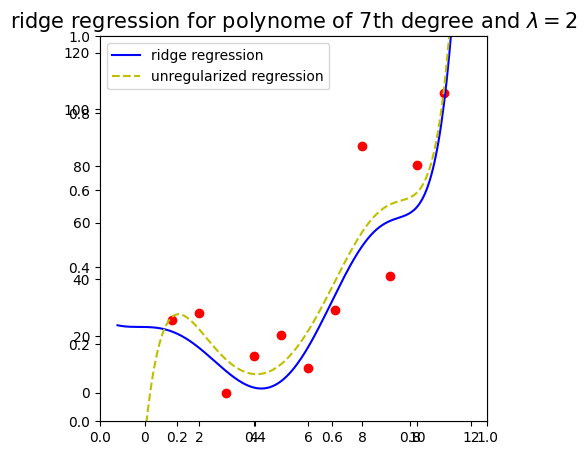

In [21]:
# here we add the mean of y to the predictions to display results in original coord. system
y_hat = np.dot(xc , params)  + np.mean(y)

f = plt.figure(figsize=(5, 5), dpi=100)
plt.title(label='ridge regression for polynome of 7th degree and $\lambda=2$', 
          fontdict={'fontsize':15})
axes = f.add_subplot(111)
# axes.tick_params(left=False, labelleft=False, top=False, labeltop=False, right=False, labelright=False, bottom=False, labelbottom=False)

axes.plot(X[:,0], y, 'ro')
axes.plot( x[:,0], y_hat.reshape((-1,)), 'b-', label='ridge regression')
#axes = plt.gca()
axes.set_ylim([np.min(y)-10, np.max(y) +20])

# now the overfitted solution
from sklearn.linear_model import LinearRegression
modelLR = LinearRegression()
modelLR.fit(X, y)
y_overfitted = np.dot(x , modelLR.coef_.T)  + modelLR.intercept_
axes.plot(x[:,0], y_overfitted, 'y--', label='unregularized regression')
leg = axes.legend()

Now, it becomes clear why Ridge Regression was invented before Lasso Regression. We have an analytical solution. Ridge is nearer to 'old school statistics' than Lasso is.

## Lasso

Alternativ zu einem quadratischen Strafterm $b^2$ könnte man auch den absoluten Wert nehmen $|b|$. In diesem Fall erhält man die sog.~Lasso Regression; $\lambda\cdot |b|$ wird zum Vorhersage-Fehler addiert:

$$\sum_i^{n}(y_i - \hat{y_i})^2 + \lambda |b|= \sum_i^{n}[y_i - (a + b\cdot x_i)]^{2}+ \lambda |b|$$

Für zwei Variablen würde man folglich schreiben:

$$\sum_i^{n}(y_i - \hat{y_i})^2 + \lambda |b_1| + \lambda |b_2|= \sum_i^{n}[y_i - (a + b_1\cdot x_{i1} + b_2\cdot x_{i2})]^{2}+ \lambda |b_1| + \lambda |b_2|$$
  
Leider gibt es im Gegesatz zur Ridge Regression keine eindeutige analytische Lösung um die Koeffizienten der Lasso Regression zu erhalten. Hier kommen iterative Verfahren zum Einsatz, wie wir sie in Session 2 kennen lernen werden.<br>
Iterative Verfahren haben sich erst sehr spät durchgesetzt - nicht zuletzt wegen der Rechenleistung die sie benötigen.

__kurzer Einschub: klassische Statistik vs. Machine Learning__<br>

* Mathematisch liess sich lange Zeit nur ein lineares Gleichungssystem zuverlässig lösen (Rechenpower). Deshalb wurde Ridge-Regression auch vor Lasso-Regression erfunden. Für ersteres Verfahren gibt es eine analytische Lösung.
* Das lineare Modell setzt voraus, dass alle Variablen darin voneinander unabhängig und normal verteilt sind. Dies trifft auf fast keinen Umstand in unserer Welt zu.
* Konfidenzintervalle und Signifikanzen sind das direkte Resultat dieser Annahmen und der damit verbundenen mathmatischen Lösung - der Inversion der Kreuzprodukt-Matrix - so wie wir das besprochen haben.
* __"Overfitting"__ ist der Begriff, der verwendet wurde, wenn das verwendete mathematische Verfahren die Daten der Stichprobe zu genau repräsentiert und auf neue Daten schlecht generalisiert. 
* Leider wurde __"overfitting"__ oft gleichbedeutend mit zu vielen Variablen verwendet.
* Wird die Grösse der Parameter (die Norm) klein gehalten (Ridge, Lasso) so tritt __"overfitting"__ nicht auf.

* Mittlerweile gibt es zuverlässige Verfahren, die overfitting zu verhindern wissen. Da die Modellannahmen in den Wissenschaften oft nur getroffen wurden, weil es für diese eine analytische Lösung gibt, müssten eigentlich viele Lehrbücher umgeschrieben werden.
* Die Verfahren mit vielen Variablen finden in vielen Anwendungen sehr gute Lösungen und haben einige Anwedungsfelder geradezu revolutioniert (Sprach- und Bilderverarbeitung). 
* Wissenschaftstheoretisch sind die neuen Verfahren nicht hinreichend, aber auch die alten Verfahren sind von geringem Nutzen, wenn die Annahmen falsch sind. 
* Es wird Zeit, bisherige klassische Statistik und Verfahren des maschinellen Lernen miteinander zu versöhnen. Eine neuere, umfassende Theorie muss entwickelt werden.
* see also: [statistical modeling: the two cultures](http://www2.math.uu.se/~thulin/mm/breiman.pdf)

```{sidebar} kurzer Einschub: klassische Statistik vs. Machine Learning
* Mathematisch liess sich lange Zeit nur ein lineares Gleichungssystem zuverlässig lösen (Rechenpower). Deshalb wurde Ridge-Regression auch vor Lasso-Regression erfunden. Für ersteres Verfahren gibt es eine analytische Lösung.
* Das lineare Modell setzt voraus, dass alle Variablen darin voneinander unabhängig und normal verteilt sind. Dies trifft auf fast keinen Umstand in unserer Welt zu.
* Konfidenzintervalle und Signifikanzen sind das direkte Resultat dieser Annahmen und der damit verbundenen mathmatischen Lösung - der Inversion der Kreuzprodukt-Matrix - so wie wir das besprochen haben.
* __"Overfitting"__ ist der Begriff, der verwendet wurde, wenn das verwendete mathematische Verfahren die Daten der Stichprobe zu genau repräsentiert und auf neue Daten schlecht generalisiert. 
* Leider wurde __"overfitting"__ oft gleichbedeutend mit zu vielen Variablen verwendet.
* Wird die Grösse der Parameter (die Norm) klein gehalten (Ridge, Lasso) so tritt __"overfitting"__ nicht auf.
* Mittlerweile gibt es zuverlässige Verfahren, die overfitting zu verhindern wissen. Da die Modellannahmen in den Wissenschaften oft nur getroffen wurden, weil es für diese eine analytische Lösung gibt, müssten eigentlich viele Lehrbücher umgeschrieben werden.
* Die Verfahren mit vielen Variablen finden in vielen Anwendungen sehr gute Lösungen und haben einige Anwedungsfelder geradezu revolutioniert (Sprach- und Bilderverarbeitung). 
* Wissenschaftstheoretisch sind die neuen Verfahren nicht hinreichend, aber auch die alten Verfahren sind von geringem Nutzen, wenn die Annahmen falsch sind. 
* Es wird Zeit, bisherige klassische Statistik und Verfahren des maschinellen Lernen miteinander zu versöhnen. Eine neuere, umfassende Theorie muss entwickelt werden.
* see also: [statistical modeling: the two cultures](http://www2.math.uu.se/~thulin/mm/breiman.pdf)
```

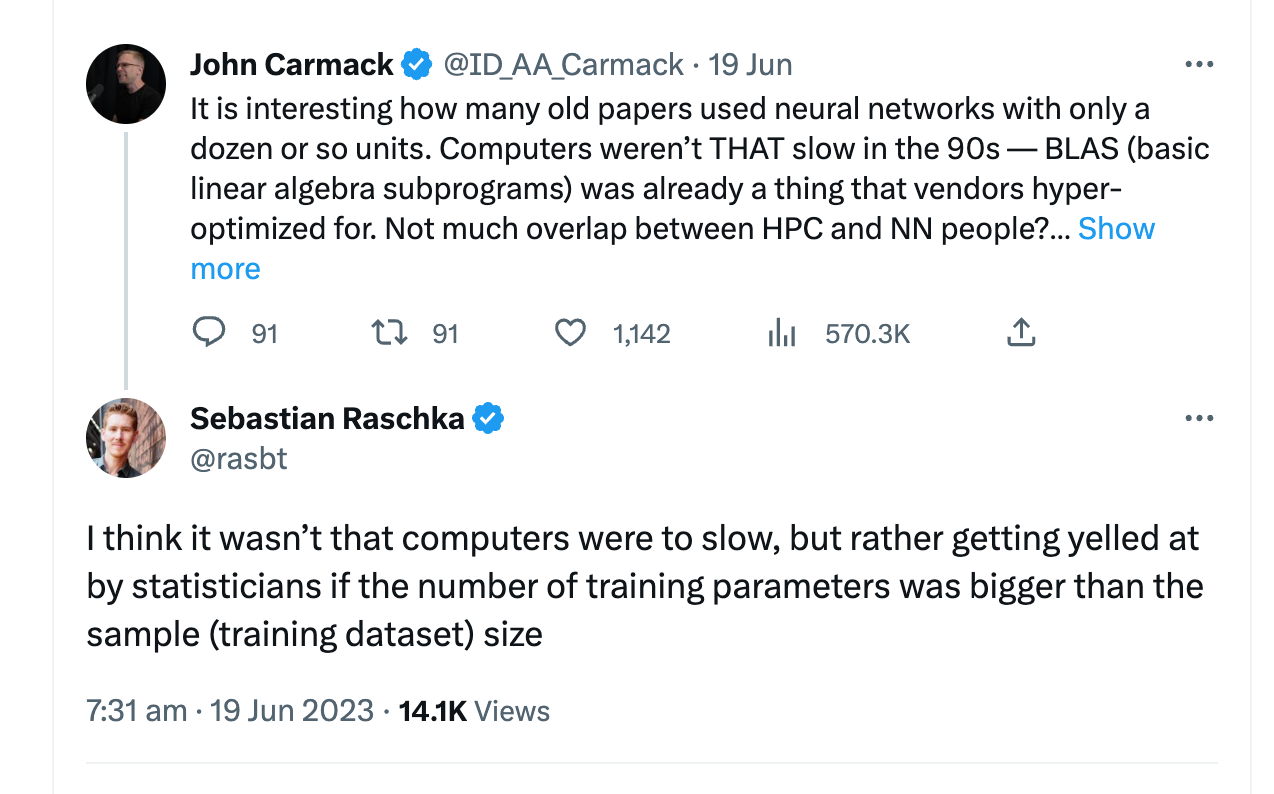

In [22]:
Image('../images/yelling_statisticians.png')

### Vergleich der Koeffizienten der Lasso Regression mit denen der Ridge Regression
Next, we will apply lasso regression as implemented in the python sklearn library and compare the results to the unconstraint regression results.<br>
As before, we have to center the variables (-> see discussion above)

In [23]:
import numpy as np
from sklearn.linear_model import Lasso
y = np.load('/home/martin/python/fhnw_lecture/scripts/regression_y.pickle.npy')
X = np.load('/home/martin/python/fhnw_lecture/scripts/regression_X.pickle.npy')

X = np.c_[X, X**2, X**3, X**4, X**5, X**6, X**7]
Xc = X - np.mean(X, axis=0)

# for plotting purpose
x = np.arange(-1, 12, 0.05).reshape((-1, 1))
x = np.c_[x, x**2, x**3, x**4, x**5, x**6, x**7]
xc = x -np.mean(x, axis = 0)

# the result as obtained from the sklearn library
model = Lasso(alpha=2, fit_intercept=False)
model.fit(Xc, y)
params_lasso = model.coef_

# comparison of parameters ridge vs. lasso:
print(f'the parameters of the ridge regression:\n'\
     + f'{np.transpose(params_ridge)}')

print(f'the parameters of the lasso regression:\n'\
     + f'{params_lasso}')

the parameters of the ridge regression:
[[-1.96523187e-01 -6.47913982e-01 -9.37247121e-01  1.55320112e-01
   3.20681203e-02 -6.80277140e-03  3.08899915e-04]]
the parameters of the lasso regression:
[-0.00000000e+00 -1.27169261e+00  2.49755651e-01  7.47152651e-04
 -5.77539403e-04 -2.73002774e-05  1.76588437e-06]


__Ridge vs Lasso__<br>

Ridge Regression tendiert dazu alle Koeffizienten im gleichen Mass zu verkleinern. Lasso führt oft zu Lösungen, bei denen einige Koeffizienten ganz zu $0$ konvergiert sind.
<br>

Wenn man die Ergebnisse im obigen Beispiel betrachtet, fällt einem auf dass für Lasso eigentlich nur zwei Koeffizienten verschieden von $0$ sind (for $X^2$ and $X^3$).<br>

Die Werte alle anderen Koeffizienten sind kleiner als $0.000747 = 7.47\text{e}^{-04}$.

```{sidebar} Ridge vs Lasso
Ridge Regression tendiert dazu alle Koeffizienten im gleichen Mass zu verkleinern. Lasso führt oft zu Lösungen, bei denen einige Koeffizienten ganz zu $0$ konvergiert sind.
```
Wenn man die Ergebnisse im obigen Beispiel betrachtet, fällt einem auf dass für Lasso eigentlich nur zwei Koeffizienten verschieden von $0$ sind (for $X^2$ and $X^3$).<br>

Die Werte alle anderen Koeffizienten sind kleiner als $0.000747 = 7.47\text{e}-04$.

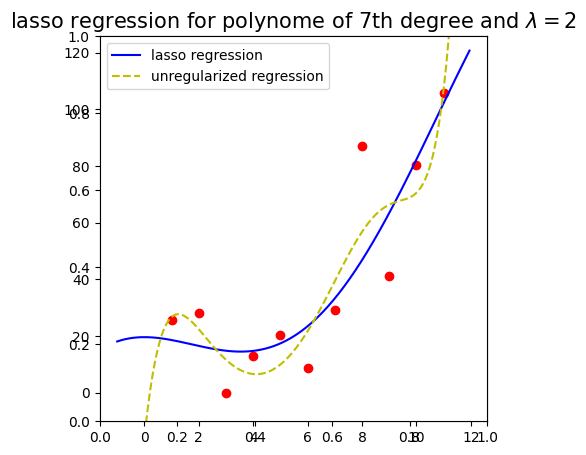

In [24]:
y_hat = np.dot(xc, model.coef_.reshape((-1,1))) + np.mean(y)
f = plt.figure(figsize=(5, 5), dpi=100)

plt.title(label='lasso regression for polynome of 7th degree and $\lambda=2$', 
          fontdict={'fontsize':15})
axes = f.add_subplot(111)
# axes.tick_params(left=False, labelleft=False, top=False, labeltop=False, right=False, labelright=False, bottom=False, labelbottom=False)
axes.plot(X[:,0], y, 'ro')
axes.plot( x[:,0], y_hat.reshape((-1,)), 'b-', label='lasso regression')          
#axes = plt.gca()
axes.set_ylim([np.min(y)-10, np.max(y) +20])

# now the overfitted solution
from sklearn.linear_model import LinearRegression
modelLR = LinearRegression()
modelLR.fit(X, y)
y_overfitted = np.dot(x , modelLR.coef_.T)  + modelLR.intercept_
axes.plot(x[:,0], y_overfitted, 'y--', label='unregularized regression')
leg = axes.legend()



## the difference between ridge and lasso


In der folgenden graphischen Darstellung haben die __wahren Koeffizienten__ die Werte $b_1=1.5,\quad b_2=0.5$. Für ein grid aus beliebigen Werten für $b_1$ und $b_2$ wird der __mean squared error__ (MSE) berechnet und der Fehler als Kontur graphisch dargestellt. Wie man sieht, wird der Fehler umso geringer, je näher die Koeffizienten im grid an den wahren Koeffizienten liegen.<br>
Als nächstes werden alle Koeffizienten-Kombinationen aus $b_1$ und $b_2$ eingetragen, deren Strafterme ($b_1^2 + b_2^2$
im Falle von Ridge und $|b_1| + |b_2|$ im Falle von Lasso) den Wert von $1.0$ nicht übersteigen. Die Lösung, die den __wahren Koeffizienten__ am nähesten ist, wird jeweils durch einen Punkt eingezeichnet.<br>

Hierbei sieht man, dass sich die besten Lösungen von 
Ridge auf einem Halbkreis bewegen, die von Lasso auf einem Dreieck. An der Stelle, an der die Lasso-Lösung der eigentlichen Lösung (b=1.5, b2=0.5) am Nähesten ist, ist ein Parameter ($b_2$) fast $0$. Das zeigt die Tendenz von Lasso, einige Parameter gegen $0$ zu schrumpfen. Dieses Verhalten kann man sich zum Beispiel bei Variablen-Selektion zu Nutzen machen.<br>

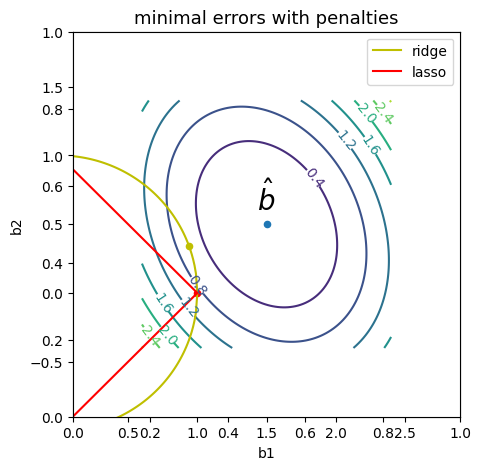

optimal coefficients of the ridge solution: 0.9393939393939394 and 0.34283965148438655
optimal coefficients of the lasso solution: 1.0 and 0.0


In [25]:
# generation of random data set:
X1 = np.random.normal(loc = 1.0, scale = 0.8, size = 100)
X2 = np.random.normal(loc = 0.5, scale = 1.2, size = 100)
beta1 = 1.5
beta2 = 0.5
Y = beta1 * X1 + beta2 * X2
X = np.c_[X1, X2]

# test with linear regression 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, Y)
model.intercept_ # essentiall zero
model.coef_ # essentially 0.2 and 0.5
#print(f'the model parameters from data generation could be recovered: {model.coef_}')

# make regular grid of values for b_1 and b_2
b1 = np.linspace(beta1 - 0.9, beta1 + 0.9, 100)
b2 = np.linspace(beta2 - 0.9, beta2 + 0.9, 100)
bb1, bb2 = np.meshgrid(b1, b2)

# compute MSE-error
Yhat = bb1.reshape(-1, 1) * X1.reshape(1, -1) + bb2.reshape(-1, 1) * X2.reshape(1, -1)
errors = np.square(Yhat - Y.reshape(1, -1))
error = np.sum(errors, axis = 1)/len(Y)
error_to_plot = error.reshape(bb1.shape)

# plot MSE-error contour
f = plt.figure(figsize=(5, 5), dpi=100)
plt.title(label='minimal errors with penalties', fontdict={'fontsize':13})
axes = f.add_subplot(111)
# axes.tick_params(left=False, labelleft=False, top=False, labeltop=False, right=False, labelright=False, bottom=False, labelbottom=False)
cp = plt.contour(bb1, bb2, error_to_plot)
plt.clabel(cp, inline=1, fontsize=10)
axes.set_xlabel('b1') 
axes.set_ylabel('b2')
axes.set_ylim([np.min(b2)-0.5, np.max(b2) + 0.5])
axes.set_xlim([np.min(b1)-0.5, np.max(b1) + 0.5])


# plot optimal solution
axes.scatter(beta1, beta2, s = 20)
axes.annotate('$\hat{b}$', xy=(beta1 , beta2 + 0.1), xycoords='data',
              horizontalalignment = 'center', size = 20)             

# all ridge solutions with a penalty budget of 1
constraint_error = 1.0
values = np.linspace(0, 1.0, 100)
constraint_l2 = np.sqrt(constraint_error - values**2)
axes.plot(values, constraint_l2, 'y-', label = 'ridge')
axes.plot(-values, constraint_l2, 'y-')
axes.plot(values, -constraint_l2, 'y-')

# all lasso solutions with a penalty budget of 1
constraint_l1 = constraint_error -values
axes.plot(values, constraint_l1, 'r-', label = 'lasso')
axes.plot(-values, constraint_l1, 'r-')
axes.plot(values, -constraint_l1, 'r-')

# best ridge solution with penalty budget of 1
Yhat_ridge = np.concatenate((values, values)).reshape(-1,1) * X1.reshape(1, -1) + \
np.concatenate((constraint_l2, -constraint_l2)).reshape(-1,1) * X2.reshape(1, -1)
errors_ridge = np.square(Yhat_ridge - Y.reshape(1, -1))
error_ridge = np.sum(errors_ridge, axis = 1)/len(Y)
index_ridge = np.where(error_ridge ==np.amin(error_ridge))[0][0]
axes.scatter(np.concatenate((values, values))[index_ridge],
             np.concatenate((constraint_l2, -constraint_l2))[index_ridge],
             s=20, c='y')

# best lasso solution with penalty budget of 1
Yhat_lasso = np.concatenate((values, values)).reshape(-1,1) * X1.reshape(1, -1) + \
np.concatenate((constraint_l1, -constraint_l1)).reshape(-1,1) * X2.reshape(1, -1)
errors_lasso = np.square(Yhat_lasso - Y.reshape(1, -1))
error_lasso = np.sum(errors_lasso, axis = 1)/len(Y)
index_lasso = np.where(error_lasso ==np.amin(error_lasso))[0][0]
axes.scatter(np.concatenate((values, values))[index_lasso],
             np.concatenate((constraint_l1, -constraint_l1))[index_lasso],
             s=20, c='r')


legs = axes.legend()
plt.show()
print(f'optimal coefficients of the ridge solution: {np.concatenate((values, values))[index_ridge]}'\
      f' and {np.concatenate((constraint_l2, -constraint_l2))[index_ridge]}')

print(f'optimal coefficients of the lasso solution: {np.concatenate((values, values))[index_lasso]}'\
      f' and {np.concatenate((constraint_l1, -constraint_l1))[index_lasso]}')


## ElasticNet


Aus der Physik kommend werden die Strafterme von Ridge und Lasso als $\text{L}_2$ und $\text{L}_1$ bezeichnet. Eigentlich ist die $\text{L}_2$-Norm die Quadratwurzel der Summe der quadrierten Elemente eines Vectors und die $\text{L}_1$-Norm nur die Summe der Vektorelemente.<br>
ElasticNet ist ein lineares Regressions-Verfahren, in welches sowohl die regularization-terms von Lasso ($\text{L}_1$), als auch von Ridge ($\text{L}_2$) eingehen. Hier gibt es nicht nur einen $\lambda$-Paramter, der das Ausmass von regularization bestimmt, sondern einen zusätzlichen Parameter $\alpha$, der das Verhältnis von $\text{L}_1$ und $\text{L}_2$ regularization angibt.

Weil Ridge Regression und Lasso die Koeffizienten sehr unterschiedlich regulieren, ist als Kompromiss die Kombination aus beiden Methoden sehr beliebt geworden. 

\begin{equation*}
\lambda\sum_j (\alpha b_j^2 + (1-\alpha)|b_j|)
\end{equation*}

Die Interpretation der beiden paramter $\lambda$ und $\alpha$ ist wie folgt:
 - $\lambda$ bestimmt das generelle Mass an regularisation
 - $\alpha$ gibt das Verhältnis an, mit dem diese beiden Strafterme indie regularisation einfliessen sollen
<br>


Im Übungs-Notebook zu den Boston house-prices werden wir ElasticNet verwenden.

# Interaction
Interaktionen sind ein weiteres wichtiges Konzept in der linearen Regression. Hier ist der Effekt einer Variablen auf die abhängige Variable $y$ abhängig von dem Wert einer anderen Variable. 

Im unterem Beispiel versuchen wir die Wahrscheinlichkeit zu modellieren, dass eine Person ein Haus kauft. Natürlich ist das monatliche Einkommen eine wichtige Variable und desto höher dieses, desto wahrscheinlicher auch, dass besagte Person ein Haus kauft. Eine andere wichtige Variable ist der Zivilstand. Verheiratet Personen mit Kindern im Haushalt tendieren stark zu Hauskauf, besonders wenn das monatliche Einkommen hoch ist. Auf der anderen Seite werden Singles, auch wenn sie ein hohes Einkommen haben, eher nicht zum Hauskauf tendieren.<br>
Wir sehen also, die Variable "monatliches Einkommen" __interagiert__ mit der Variable "Zivilstand": __Der Effekt der beiden Variablen zusammen ist mehr als die Summe der Effekte der einzelnen Variablen__.

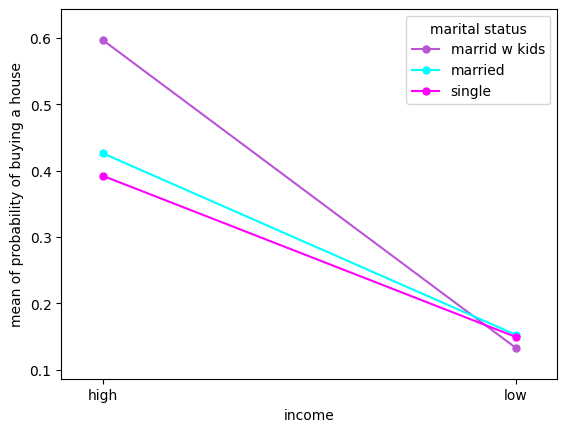

In [26]:
import numpy as np
from statsmodels.graphics.factorplots import interaction_plot
import pandas as pd

income = np.random.randint(0, 2, size = 80) # low vs high
marital = np.random.randint(1, 4, size = 80) # single, married, married & kids

probability = np.random.rand(80) + income * np.random.rand(80) * marital
probability = (probability - np.min(probability))
probability = probability/np.max(probability)

marital = pd.Series(marital)
marital.replace(to_replace = {1:'single', 2:'married', 3:'marrid w kids'}, inplace =True)

income = pd.Series(income)
income.replace(to_replace = {0:'low', 1:'high'}, inplace = True)

fig = interaction_plot(income, marital, probability,
                       colors=['mediumorchid', 'cyan', 'fuchsia'], ms=10, xlabel='income',
                       ylabel='probability of buying a house',
                       legendtitle='marital status')


Das obige Beispiel beinhaltete kategorielle Variablen. Beispiele wie diese trifft man oft im Bereich der Varianzanalysen (ANOVA) an.<br>
Interaktions-Effekte bestehen aber auch für kontinuierliche Variablen. In diesem Fall ist es aber etwas komplizierter die Effekte zu visualisieren.<br>
Wir werden jetzt unseren eigenen Datensatz so erzeugen, dass er einen deutlichen Interaktions-Effekt aufweist. Damit der Effekt zwischen 2 kontinuierlichen Variablen überhaut in 2D dargestellt werden kann, musss eine der beiden Variablen wieder diskretisiert werden, d.h. wir müssen für sie wieder Kategorien bilden.<br>
Im nächsten Rechenbeispiel versuchen wir dann, die Parameter, die zur Generierung der Daten gedient haben mit einer Linearen-Regressions-Analyse wieder zu finden.<br>
Die Daten wurden nach folgendem Modell generiert:

\begin{equation*}
y = 2\cdot x + -2\cdot m + -7\cdot (x\cdot m) + \text{np.random.normal(loc = 0, scale = 4, size = n)}
\end{equation*}

`np.random.normal(loc=0, scale=4, size=n)` ist der Random-Error-Term, den wir hinzufügen, damit die Daten nicht alle auf einer Linie liegen. `loc=0` besagt, dass der Mittelwert unseres zufälligen Fehlers $0$ ist, `scale=4`, dass die Varianz der Werte $4$ ist und `size=n` gibt die Anzahl der zu generierenden zufälligen Werte an

Folgliche haben wir also die Koeffizienten:
 - $b_x = 2$
 - $b_m = -2$
 - $b_{x\cdot m} = -7$

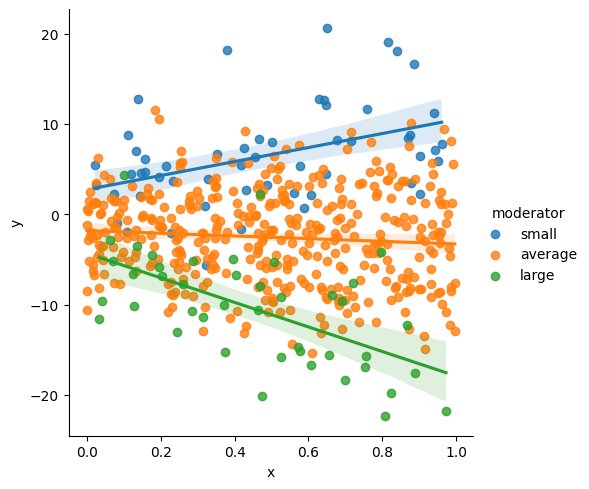

In [27]:
import seaborn as sns
n = 500
x = np.random.uniform(size=n)
m = np.random.normal(loc = 0.5, scale = 1, size = n)

#  lin effects + interaction + random error
y = 2*x + -2*m + -7*(x*m) + np.random.normal(loc = 0, scale = 4, size = n)

newM = pd.cut(m, bins=3, labels = ['small', 'average', 'large'])


toy = pd.DataFrame({'x' : x, 'y' : y, 'moderator' : newM})
sns.lmplot(x="x", y="y", hue="moderator", data=toy);

Interaktions-Terme können gebildet werden, indem man zwei Variablen elemente-weise miteinander multipliziert.
Durch die Hinzuname weiterer Terme sollte die Modell-Anpassung eigentlich besser werden - besonders wenn ein starker Interaktions-Effekt in den Daten vorliegt, so wie wir ihn eingebaut haben.<br>
Vergleichen wir die Koeffizienten, so wie sie im Linearen-Modell gefunden werden mit denen, die zur Erzeugung unseres Datensatzes gedient haben. Gar nicht schlecht, oder? Die zufälligen Fehler mit der grossen Varianz sorgen natürlich dafür, dass sie dennoch von den 'generating parameters' verschieden sind.

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = np.c_[x, m]
model.fit(X, y)
y_hat = model.intercept_  + np.dot(X, model.coef_)
print(f'without considering the interaction, the mse is: {np.mean((y-y_hat)**2)}')

X = np.c_[x, m, x * m]
model.fit(X, y)
y_hat = model.intercept_  + np.dot(X, model.coef_)
print(f'considering the interaction, the mse drops to: {np.mean((y-y_hat)**2)}')
print(f'\nthe coefficients are given by {model.coef_}; compare these values\n to the values we used for generating the data (2, -2, -7)')

without considering the interaction, the mse is: 17.726539288004822
considering the interaction, the mse drops to: 14.582681076133479

the coefficients are given by [ 1.93040989 -2.08333003 -6.37990657]; compare these values
 to the values we used for generating the data (2, -2, -7)


### some considerations
Die Überlegung hier veranschaulicht, dass es schon bei moderater Variablen-Anzahl sehr viele mögliche Interaktions-Terme gibt. Für die normale Lineare Regression würde die grosse Anzahl dieser Terme zum Verhängnis werden, weil dann wieder der Fall eintreten könnte indem wir die Daten overfitten oder gar mehr Variablen als Beobachtungen zur Verfügung stehen. Auch in diesem Fall kann auf die vorgestellten Regularisierungs-Verfahren (ElasticNet, Ridge und Lasso) zurückgegriffen werden:

Nehmen wir an, wir haben ein data-set mit 70 verschiedenen Variablen. Weil wir nichts über die Beziehungen der Variablen zur abhängigen Variable $y$ noch über die Beziehungen der Variablen untereinander wissen, sind wir geneigt eine Menge zusätzlicher 'features' für unser Modell zu erzeugen:

* wir können 70 quadratische Terme hinzufügen ($x_j^2$)
* wir können 70 kubische Terme aufnehmen ($x_j^3$)
* wir können auch $\binom{70}{2} = 2415$ Interaktionen erster Ordnung zwischen den 70 Variablen annehmen
* anstatt dessen könnte wir auch die Interaktions-Terme der 210 (70 Variablen + 70 quadratische Terme + 70 kubische Terme) Variablen mit aufnhemne: $\binom{210}{2} = 21945$
* neben quadratisch und kubischen Termen gibt es auch viele andere linearisierende Transformation, die unter Umständen zu besseren ergebnissen führen wie beispielsweise die log-Transformation. Im praktischen Beipiel des Bosten house-prices data-Sets werden wir die `box-cox-Transformation` kennen lernen.

Wie wir gesehen haben, kann die Anzahl möglicher Variablen sehr schnell wachsen, wenn man alle Effekte berücksichtigt, die ausschlaggebend sein könnten. Manchmal existieren sogar Interaktionseffekte zweiter Ordnung, d.h. drei Variablen sind dann daran beteiligt. <br>
Würden wir alle möglichen Variablen berücksichtigen, die sich derart bilden lassen, dann würde dies auch bei grossen Daten-Sets zu ausgeprägten 'overfitting' führen. __Aus diesem Grund wurden die regularization techniques wie das  ElasticNet und seine Komponenten, die Ridge Regression und die Lasso Regression eingeführt__.

## Wie zuversichtlich sind wir hinsichtlich unserer Modell-Vorhersagen

Selten werden wir mit unserem Modell genau die Koeffizienten schätzen können, die in der gesamten Population (alle Daten, die wir erheben könnten) anzutreffen sind. Viel öfter ist unsere Stichprobe nicht repräsentativ für die gesamte Population oder sie ist schlicht zu klein und zufällige, normalverteilte Fehler in unseren Daten beeinflussen die Schätzung der Koeffizienten. Dies umsomehr, desto mehr Variablen wir in user Modell aufnehmen.<br>
Wie können wir nun die Güte unserer Schätzung beurteilen? Hier sind mindestens zwei verschieden Fragen denkbar:

* Wie sicher sind wir mit Hinblick auf die geschätzen Koeffizienten $\mathbf{b}$?. Diese Frage ist besonders für Wissenschaftler wichtig, da die Antwort dafür ausschlaggebend ist, ob eine Hypothese beibehalten oder verworfen werden muss.
* Wie sicher sind wir uns bezüglich einzelner Vorhersagen. Dies spielt die grösste Rolle im Machine Learning Umfeld, da wir das trainierte Modell gerne in unsere Business-Abläufe integrieren würden.

Diese beiden Fragestellungen lassen sich mit Hinblick auf die Regression auch wie folgt formulieren:
   * Wie sehr ist die 'mean response', die Vorhersage unsere Regressions-Funktion von der Stichprobe abhängig. Variiert Erstere sehr stark und umfasst unter Umständen sogar den Wert $0$, dann können diese Effekte (Koeffizienten) nicht interpretiert werden.
   * Wie sehr können Beobachtungen $y$ für eine gegebene Kombination von Variablen-Werten in $\mathbf{X}$ variieren? Ist diese Variation sehr gross, so werden wir auch grosse Fehler in unseren Business-Process einbauen

## Recap of assumptions underlying regression
Dies sind Linearität (der Zusammenhang einer Variablen und der abhängigen Variablen ist linear, d.h. der selbe Steigungsparamter gilt für alle Bereiche der Variablen), Homoskedastizität (die Fehler der Regression -- die Residuen -- sind in allen Bereichen von X normal verteilt mit gleicher Varianz) und Normalität der Residuen bei gegebenem Wert von X.
Diese Voraussetzungen sind in vielen Fällen nicht erfüllt und auch bekannterweise verletzt. 


* __Linearity__: Die Regression-Funktion ist eine gute Annäherung für die Beziehung zwischen $\mathbf{X}$ and $\mathbf{y}$, d.h. ist ein quadratischer Trend in den Daten und wir haben keine quadratischen Effekte in das Modell aufgenommen, so sind die Annahmen nicht erfüllt. Die Linearität besagt nämlich, dass für den Zusammenhang einer Variablen $x$ und der abhängigen Variablen $y$ der selbe Steigungs-Koeffizient $b_x$ für alle Bereiche von $x$ gelten muss. Ansonsten hat das Modell einen __bias__, es schätzt einen Koeffizienten systematisch falsch.
* __Homoscedasticity__: Die Varianz unseres Vorhersagefehlers (Residuen) ist für alle Bereiche einer Variablen $x$ identisch.
* __Normality__: Die Werte der abhängigen Variablen $\mathbf{y}$ sind für einen gegeben Wert von $\mathbf{x}$ normal verteilt: $\mathbf{y}|\mathbf{x} \sim N(\mu, \sigma)$<br>

In der nächsten Graphik werden die Voraussetzungen der linearen Regression veranschaulicht:<br>
Image taken from [here](https://janhove.github.io/analysis/2019/04/11/assumptions-relevance)

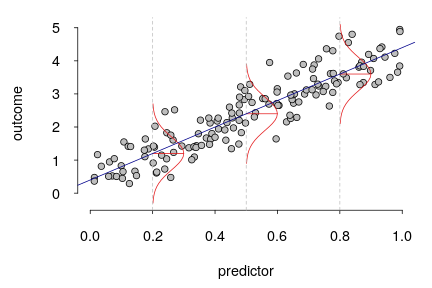

In [29]:
Image('../images/homoscedasticity.png')

Now, with respect to our confidence need:
1. __Vohersage Intervall (prediction interval)__: Dies ist das Intervall, in welchem mit (1-$\alpha$)% Wahrscheinlichkeit die beobachteten $y$ Werte zu unseren vorhergesagten Werten $\hat{y}$ liegen. Dieses Intervall ist symmetrisch um die Regressionsfunktion - was natürlich aus den Voraussetzungen der linearen Regression folgt. Der Standardfehler der Vorhersage ist gegeben durch:
\begin{equation*}
\hat{\sigma}_e = \sqrt{\frac{1}{N-(p+1)}\sum_i^N e_i^2}, 
\end{equation*}
hier ist $p$ die Anzahl der Parameter im Modell (der zusätzliche Parameter $+1$ kommt vom intercept); $e_i$ sind die Vorhersage-Fehler, die Residuen, also die Differenz aus unseren vorhergesagten $\hat{y}_i$ und den beobachteten Werten $y_i$. Das Konfidenz-Intervall ergibt sich zu:
<br>
\begin{equation*} 
CI_i = y_i \pm t_{1-\alpha/2, N-p} \cdot \hat{\sigma}_e.
\end{equation*}
Hier ist $t_{1-\alpha/2, N-p}$ der Wert der Student-t-Verteilung für das Konfidenzlevel von $1-\alpha/2$ und $N-p$ Freiheitsgraden. Der Wert von $\alpha$ gibt an, wie sehr wir uns mit dem Konfidenzintervall gegen falsche Entscheidungen absichern wollen. Wollen wir beispielseweise mit 95% Sicherheit den Bereich angeben können, in dem die beobachteten Werte liegen, dann müssen wir als untere Konfidenzgrenze den Wert bestimmen unterhalb dessen nur mit einer Wahrscheinlichkeit von 2.5% die beobachteten Werte liegen und als obere Konfidenzgrenze den Wert unterhalb dessen mit einer Wahrscheinlichkeit von 97.5% die beobachteten Werte liegen. So machen wir nur in 5% aller Fälle einen Fehler, $\alpha = 0.05$ und weil das Konfidenzintervall symmetrisch ist benötigen wir den Wert $1-\alpha/2$ damit wir von beiden Enden 2.5% abschneiden.

2. __Mean Prediction Confidence interval__: In ähnlicher Weise können wir ein Konfidenzintervall für unsere durchschnittliche Vorhersage $\hat{\bar{y}}$ bestimmen. Wir erinnern uns, dass die Regressions-Funktion unsere Vorhersage ist und die Daten um diese normal verteilt sein sollten. Weil unsere Stichprobe aber nur eine Momentaufnahme eines Auschnitts aller möglichen Werte ist, die wir erheben könnten, wird die Regressions-Funktion je nach Stichprobe variieren. Das Konfidenz-Intervall gibt an, in welchem Bereich die Regressions-Funktion mit grosser Wahrscheinlichkeit liegen würde, könnten wir alle Daten erfassen (die gesamte Population). 
Das Konfidenzintervall ist nicht für alle Werte von $x$ gleich weit. Dort wo wenige Messwerte vorliegen kann der genaue Verlauf schlechter geschätzt werden als dort wo wir eine breitere Datenbasis für die Schätzung haben. Nahe dem Mittelwert von $x$, also bei $\bar{x}$ sollte unsere Schätzung immer genauer sein als nahe den Extremwerten. Natürlich gehen wir wieder von normalverteilten $x$ Werten aus.

3. __CI for regression coefficients__: Auch diese Intervall ist schwierig zu bestimmen. Es gibt die obere und untere Grenze für unsere Regressions-Koeffizienten $\mathbf{b}$. Die Interpretation dieser Koeffizienten findet vor allem in der Wissenschaft statt. Es kann getestet werden, ob ein a priori postulierter Effekt tatsächlich vorliegt oder nicht. Umfasst das Konfidenzintervall für einen Koeffizienten $b$ den Wert Null, so kann nicht ausgeschlossen werden, dass der Effekt in der Stichprobe nur rein zufällig zu Stande kommt. Beispielsweise könnte folgende Fragestellung hiermit untersucht werden: "Hat die Schliessung von Schulen und Universitäten einen signifikanten Einfluss auf die Reproduktions-Zahl $R_0$ oder nicht". Dies ist typerischweise nicht die Art von Fragestellung, mit der sich Data Scientists beschäftigen.

Im nachfolgenden Beispiel sehen wir die typische Ausgabe eines klassischen, statistischen Ansatzes. In der Mitte sehen wir die Konfidenz-Intervalle für die Regressions-Koeffizienten, `const` (intercept) und `x1`, d.h. der Koeffizient der Variablen $x_1$, also $b_1$. Der intercept ist nicht signifikant, weil das Konfidenzinervall ($\left[-43.351, 26.370\right]$) den Wert $0$ umfasst. Der Koeffizient $b_1$ für die Variable $x_1$ ist aber signifikant von $0$ verschieden. Sein Konfidenzintervall ist $\left[2.939, 13.219\right]$.<br>

Bei grossem Interesse für klassische statistische Modelle kann ich für python diese [Quelle](http://web.vu.lt/mif/a.buteikis/wp-content/uploads/PE_Book/3-7-UnivarPredict.html) empfehlen.

In [30]:
import statsmodels.api as sm

# data example
y = np.load('/home/martin/python/fhnw_lecture/scripts/regression_y.pickle.npy')
X = np.load('/home/martin/python/fhnw_lecture/scripts/regression_X.pickle.npy')

# the x (small x) is just for plotting purpose
x = np.arange(1, 12, 0.05).reshape((-1, 1))
x_intercept = np.c_[np.ones(x.shape[0]), x]


X_intercept = np.c_[np.ones(X.shape[0]), X]

ols_result_lin = sm.OLS(y, X_intercept).fit()
y_hat_lin = ols_result_lin.get_prediction(x_intercept)



dt_lin = y_hat_lin.summary_frame()
mean_lin = dt_lin['mean']
meanCIs_lin = dt_lin[['mean_ci_lower', 'mean_ci_upper']]
obsCIs_lin = dt_lin[['obs_ci_lower', 'obs_ci_upper']]

In [31]:
from IPython.display import display, HTML
print(ols_result_lin.summary()) # beta-coefficients

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     12.64
Date:                Tue, 20 Feb 2024   Prob (F-statistic):            0.00616
Time:                        14:47:42   Log-Likelihood:                -49.385
No. Observations:                  11   AIC:                             102.8
Df Residuals:                       9   BIC:                             103.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.4903     15.410     -0.551      0.5

(-10.0, 115.77315979942053)

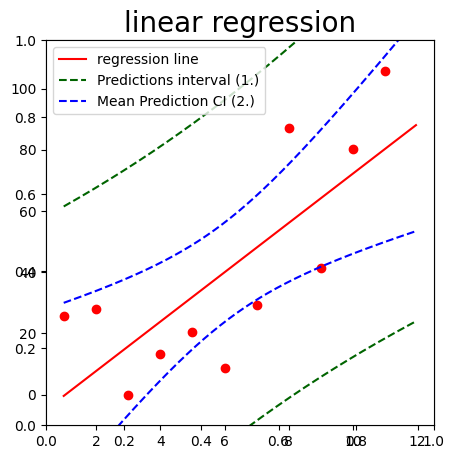

In [32]:
### figure for linear plot
f = plt.figure(figsize=(5, 5), dpi=100)
plt.title(label='linear regression', fontdict={'fontsize':20})
axes = f.add_subplot(111)
# axes.tick_params(left=False, labelleft=False, top=False, labeltop=False, right=False, labelright=False, bottom=False, labelbottom=False)
axes.plot(X_intercept[:,1], y, 'ro')
axes.plot(x_intercept[:, 1], mean_lin.values.reshape((-1,)), color = "red", label = "regression line")
axes.plot(x_intercept[:, 1], obsCIs_lin.iloc[:, 0], color = "darkgreen", linestyle = "--", 
         label = "Predictions interval (1.)")
axes.plot(x_intercept[:, 1], obsCIs_lin.iloc[:, 1], color = "darkgreen", linestyle = "--")

axes.plot(x_intercept[:, 1], meanCIs_lin.iloc[:, 0], color = "blue", linestyle = "--", 
         label = "Mean Prediction CI (2.)")
axes.plot(x_intercept[:, 1], meanCIs_lin.iloc[:, 1], color = "blue", linestyle = "--")
axes.legend()

axes.set_ylim([np.min(y)-10, np.max(y) +10])

Als nächstes berechnen wir die Konfidenzintervalle für die Regression mit einem quadratischen Term.<br>
Hierbei fällt auf, dass zwar jetzt der quadratische Term `x2` signifikant ist (Intervall $\left[0.247, 3.125\right]$), nicht mehr aber der `x1` Term.

In [33]:
X_intercept_quad = np.c_[X_intercept, X**2]

# for plotting:
x = np.arange(1, 12, 0.05).reshape((-1, 1))
x_intercept_quad = np.c_[np.ones(x.shape[0]), x, x**2]

ols_result_quad = sm.OLS(y, X_intercept_quad).fit()


y_hat_quad = ols_result_quad.get_prediction(x_intercept_quad)
dt_quad = y_hat_quad.summary_frame()
mean_quad = dt_quad['mean']
meanCIs_quad = dt_quad[['mean_ci_lower', 'mean_ci_upper']]
obsCIs_quad = dt_quad[['obs_ci_lower', 'obs_ci_upper']]

In [34]:
print(ols_result_quad.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     14.39
Date:                Tue, 20 Feb 2024   Prob (F-statistic):            0.00224
Time:                        14:47:43   Log-Likelihood:                -45.820
No. Observations:                  11   AIC:                             97.64
Df Residuals:                       8   BIC:                             98.83
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.3379     20.074      1.760      0.1

(-10.0, 115.77315979942053)

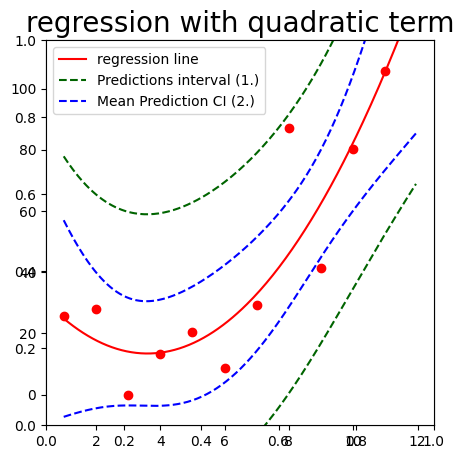

In [35]:
### figure for linear plot
f = plt.figure(figsize=(5, 5), dpi=100)
plt.title(label='regression with quadratic term', fontdict={'fontsize':20})
axes = f.add_subplot(111)
# axes.tick_params(left=False, labelleft=False, top=False, labeltop=False, right=False, labelright=False, bottom=False, labelbottom=False)
axes.plot(X_intercept_quad[:,1], y, 'ro')
axes.plot(x_intercept_quad[:, 1], mean_quad.values.reshape((-1,)), color = "red", label = "regression line")
axes.plot(x_intercept_quad[:, 1], obsCIs_quad.iloc[:, 0], color = "darkgreen", linestyle = "--", 
         label = "Predictions interval (1.)")
axes.plot(x_intercept_quad[:, 1], obsCIs_quad.iloc[:, 1], color = "darkgreen", linestyle = "--")

axes.plot(x_intercept_quad[:, 1], meanCIs_quad.iloc[:, 0], color = "blue", linestyle = "--", 
         label = "Mean Prediction CI (2.)")
axes.plot(x_intercept[:, 1], meanCIs_quad.iloc[:, 1], color = "blue", linestyle = "--")
axes.legend()

axes.set_ylim([np.min(y)-10, np.max(y) +10])

## Bootstrap

Die Daten, mit denen ein Data Scientist normalerweise arbeitet, erfüllen meist nie die Voraussetzungen der Linearen Regression. Deshalb können wir auch die Theory zu den Konfidenzintervallen nicht anwenden - schliesslich beruht sie auf den Annahmen wie normalverteilte Daten.<br>
Eine robuste, parameter-freie Alternative ist der __Bootstrap__. Gewissernahmen ziehen wir uns an den eigenen Haaren aus dem Schlamassel:
 - Wir betrachten unsere Stichprobe als die Gesamtheit (Population) der Daten.
 - Nun ziehen wir wiederholt und mit Zurücklegen neue Stichproben aus dieser Stichprobe.
 - Für jede dieser Stichproben wird das Modell angepasst und die relevanten Statistiken werden gespeichert.
 - Abschliessend finden wir in unseren gespeicherten Statistiken das 2.5% Quantil (der Wert, unter dem nur 2.5% der Beobachtungen liegen) und das 97.5% Quantil (der Wert über dem nur noch 2.5% der Beobachtungen liegen). Diese Werte teilen wir als untere und obere Grenze des Konfidenz-Intervalls mit, bei einem Konfidenz-Level von $\alpha=0.05$.

Nachfolgendes Code-Beispiel veranschaulicht den Vorgang:<br>
* `sampler = (choices(indices, k = len(indices)) for i in range(200))` erzeugt einen Generator, der 200 Mal eine Zufallsstichprobe zieht.
* `np.percentile(np.array([Lasso(alpha=2, fit_intercept=True).fit(X[drew,:], y[drew, :]).predict(x).tolist() for drew in sampler]), [2.5, 97.5], axis = 0)` 
iteriert über den Generator und passt insgesammt 200 mal das Modell an und macht eine Vorhersage für kontinuierliche x-Werte im Bereich von 1 bis 12. Diese Vorhersagen werden in einem numpy-array (`np.array`) gespeichert und zu Schluss die Funktion `np.percentile` auf die 200 Vorhersagen angewendet. Somit erhalten wir für den x-Bereich von 1 bis 12 die Intervall-Grenzen für die mean-preditction, d.h. die Regressions-Funktion

In [36]:
from random import choices
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings('ignore')


y = np.load('/home/martin/python/fhnw_lecture/scripts/regression_y.pickle.npy')
X = np.load('/home/martin/python/fhnw_lecture/scripts/regression_X.pickle.npy')


#X = np.c_[np.ones(X.shape[0]), X, X**2, X**3, X**4]
X = np.c_[X, X**2, X**3, X**4]
x = np.arange(1, 12, 0.05).reshape((-1, 1))
#x = np.c_[np.ones(x.shape[0]), x, x**2, x**3, x**4]
x = np.c_[x, x**2, x**3, x**4]
indices = np.arange(0, X.shape[0])


sampler = (choices(indices, k = len(indices)) for i in range(200))

CIS = np.percentile(np.array([Lasso(alpha=2, fit_intercept=True).fit(X[drew,:], y[drew, :])\
                              .predict(x).tolist()
                              for drew in sampler]), [2.5, 97.5], axis = 0)
# x is 220 long
model = Lasso(alpha=2, fit_intercept=True)
model.fit(X, y)
y_hat = model.predict(x)

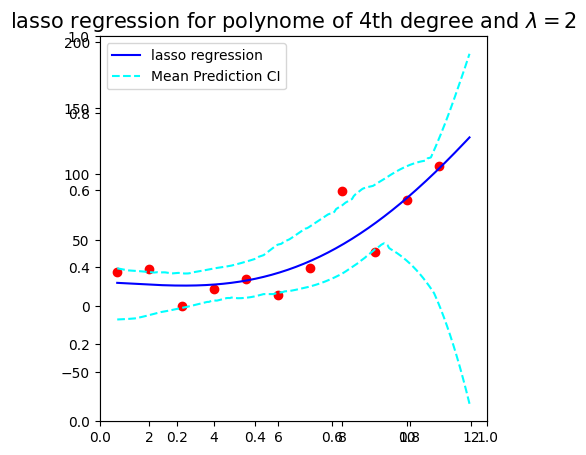

In [37]:
f = plt.figure(figsize=(5, 5), dpi=100)
plt.title(label='lasso regression for polynome of 4th degree and $\lambda=2$', 
          fontdict={'fontsize':15})
axes = f.add_subplot(111)
# axes.tick_params(left=False, labelleft=False, top=False, labeltop=False, right=False, labelright=False, bottom=False, labelbottom=False)

axes.plot(X[:,0], y, 'ro')
axes.plot( x[:,0], y_hat.reshape((-1,)), 'b-', label='lasso regression')

axes.plot(x[:, 0], CIS[0, :], color = "cyan", linestyle = "--", 
         label = "Mean Prediction CI")
axes.plot(x[:, 0], CIS[1, :], color = "cyan", linestyle = "--")
axes.legend()

# Extension: logistic regression and the GLM

Es gibt andere Modelle, die eng verwandt mit der hier besprochenen Linearen Regression sind. Das Prominenteste unter ihnen ist die __Logistische Regression__. Diese Modell gehört zu dem "__Verallgemeinerten Linearen Modell__" (im engl. __generalized lineare model__ (GLM)). Diese Modelle dürfen nicht mit dem "__Allgemeinen Linearen Modell__" (im engl. __general linear model__) verwechselt werden. Letzteres parametrisiert eine Varianzanalyse als ein lineares Modell mit Dummy-Variablen.<br>
Das Verallgemeinerte Lineare Modell erweitert die Lineare Regression um Modelle, deren Fehler nicht normalverteilt sind.<br>
[Dieser Artikel](https://en.wikipedia.org/wiki/Generalized_linear_model#Confusion_with_general_linear_models) in der Wikipedia gibt weitere Auskunft.

## exponential family of distributions
Aus der Perspektive der Modernen Statistik beinhaltet das Verallgemeinerte Lineare Modell verschiedene Lineare Modelle, unter anderem das der klassischen linearen Regression. Eine Verteilung, die in der "exponential family" von Verteilungen ist, kann immer folgendermassen geschrieben werden:

\begin{equation}
f(y| \theta) = \exp\left(\frac{y \theta + b(\theta)}{\Phi} + c(y, \Phi)\right),
\end{equation}

wobei $\theta$ als Kanonischer Parameter bezeichnet wird, welcher eine Funktion von $\mu$ ist dem Mittel. Diese Funktion wird als Kanonische Link-Funktion bezeichnet. Wie wir später an einem Beispiel sehen werden, ist es genau diese Funktion welche die Beziehung zwischen der abhängigen Variablen und den unabhängigen Variablen linearisiert.<br>
Der Vollständigkeit halber: $b(\theta)$ ist eine Funktion des Kanonischen Parameters und ist somit ebenfalls von $\mu$ abhängig. $\Phi$ wird als Streuungsparameter bezeichnet und $c(y, \Phi)$ ist eine Funktion, die sowohl von beobachteten Daten wie auch dem Streuungsparameter abhängig ist.

### Normalverteilung

\begin{eqnarray*}
f(y| \mu, \sigma) =& (2\pi \sigma^2)^{-\frac{1}{2}} \exp\left(-\frac{1}{2}\frac{y^2 -2y\mu + \mu^2}{\sigma^2}\right) \\
 =&\quad \exp \left(\frac{y\mu -\frac{\mu^2}{2}}{\sigma^2} - \frac{1}{2}\left(\frac{y^2}{\sigma^2} + \log(2\pi\sigma^2\right)\right),\quad \text{wobei}
\end{eqnarray*}

$\mu = \theta(\mu)$, d.h. $\mu$ ist der Kanonische Parameter und die Link-Funktion ist die Identitäts-Funktion. Der Mittelwert kann also ohne weitere Transformation direkt modelliert werden, so wie wir es in der klassischen Linearen Regression machen.
Der Streuungsparameter $\Phi$ ist durch $\sigma^2$, die Varianz gegeben. Dies ist die klassische Lineare Regression normalverteilter Variablen

### Poisson distribution
Die Poisson-Verteilung gehört ebenfalls der exponential family von Verteilungen an:

\begin{eqnarray*}
f(y| \mu) =& \frac{\mu^{y} e^{-\mu}}{y!} = \mu^y e^{-\mu}\frac{1}{y!}\\
=& \quad\exp\left(y \log(\mu) - \mu - \log(y!)\right)
\end{eqnarray*}

Die Link-Funktion ist hier $\log(\mu)$. Beachte bitte, dass die Poisson-Verteilung keinen Streuungsparameter besitzt.


### Bernoulli distribution $\Rightarrow$ logistic regression
Zuguter Letzte, die Bernoulli Verteilung, von der wir die Logistische Regression ableiten können.
Die Bernoulli Verteilung eignet sich um binäre Ereignisse zu modellieren, die sich gegenseitig ausschliessen. Ein klassisches Beispiel ist der wiederholte Münzwurf. Die Wahrscheinlichkeit für 'Kopf' wird mit $\pi$ bezeichnet, dir für 'Zahl' mit $(1-\pi)$. Hiermit lässt sich die Wahrscheinlichkeit berechnen, mit einer fairen Münze bei 10 Würfen eine bestimmte Sequenz mit genau 7 Mal 'Kopf' zu erhalten:

\begin{equation}
\pi^7 (1-\pi)^3 = 0.5^7 0.5^3 = 0.5^{10} = 0.0009765625
\end{equation}

__Vorsicht__, wenn wir die Wahrscheinlichkeit für Sequenzen mit genau 7 Mal Kopf berechnen wollen, benötigen wir noch den Binomial-Koeffizienten, der uns die Anzahl an möglichen Sequenzen mit 7 Mal 'Kopf' angibt.<br>

Jetzt zeige ich, wie wir die Bernoulli Verteilung so umschreiben können, dass man ihre Zugehörigkeit zur exponential family von Verteilungen erkennt:

\begin{eqnarray*}
f(y |\pi) =& \pi^y (1-\pi)^{1-y} = \exp\left(y \log(\pi) + (1-y) \log(1-\pi)\right)\\
= & \quad \exp\left(y \log(\pi) + \log(1-\pi) - y\log(1-\pi)\right)\\
=&\quad \exp\left(y\log(\frac{\pi}{1-\pi}) + \log(1-\pi)\right),\quad\text{wobei}
\end{eqnarray*}

sich die Link-Funktion zu $\log(\frac{\pi}{1-\pi})$ ergibt. Diese Funktion wird auch als Logit-Funktion bezeichnet. Die Umkehrfunktion der Logit-Funktion ist die __Logistische Funktion__. Es ist also die Logit-Funktion, die als lineare Kombination der unabhängigen Variablen modelliert wird.
$\log(\frac{\pi}{1-\pi}) = a + b_{1}x_1 + \ldots + b_jx_j$. Wenn wir den rechten Teil dieser Gleichung in die Logistische Funktion einsetzen erhalten wir die geschätzten Wahrscheinlichkeiten:

\begin{equation}
P(y=1 |x) = \frac{\exp(a + b_{1}x_1 + \ldots + b_jx_j)}{1 + \exp(a + b_{1}x_1 + \ldots + b_jx_j)}.
\end{equation}

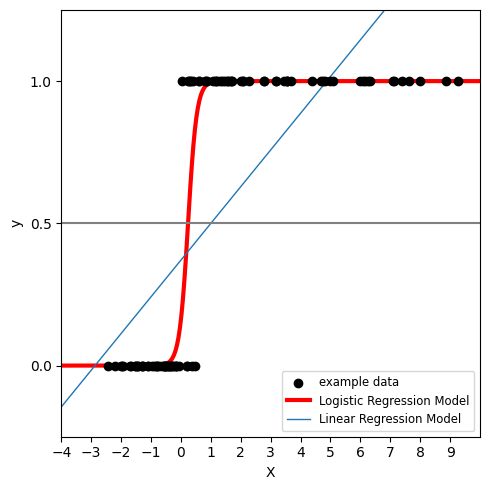

stolen from: https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic.html


In [38]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit
from sklearn.linear_model import LinearRegression, LogisticRegression

# Generate a toy dataset, it's just a straight line with some Gaussian noise:
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(float)
X[X > 0] *= 4
X += 0.3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]

# Fit the classifier
clf = LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(5, 5), dpi=100)
plt.clf()
plt.scatter(X.ravel(), y, label="example data", color="black", zorder=20)
X_test = np.linspace(-5, 10, 300)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, label="Logistic Regression Model", color="red", linewidth=3)

ols = LinearRegression()
ols.fit(X, y)
plt.plot(
    X_test,
    ols.coef_ * X_test + ols.intercept_,
    label="Linear Regression Model",
    linewidth=1,
)
plt.axhline(0.5, color=".5")

plt.ylabel("y")
plt.xlabel("X")
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-0.25, 1.25)
plt.xlim(-4, 10)
plt.legend(
    loc="lower right",
    fontsize="small",
)
plt.tight_layout()
plt.show()
print('stolen from: https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic.html')

Somit haben wir also gezeigt, dass das klassische Lineare Regressions-Modell nur ein Spezialfall einer grossen Anzahl von Modellen ist, deren Verteilungen alle in der exponential family enthalten sind.
 (Für eine vollständigere Abhandlung dieses Themas:
https://en.wikipedia.org/wiki/Generalized_linear_model.)

[This AI Guru still gets it wrong](https://www.linkedin.com/posts/mattdancho_logistic-regression-is-the-most-important-activity-7167118676784050176-WgjD/?utm_source=share&utm_medium=member_android)

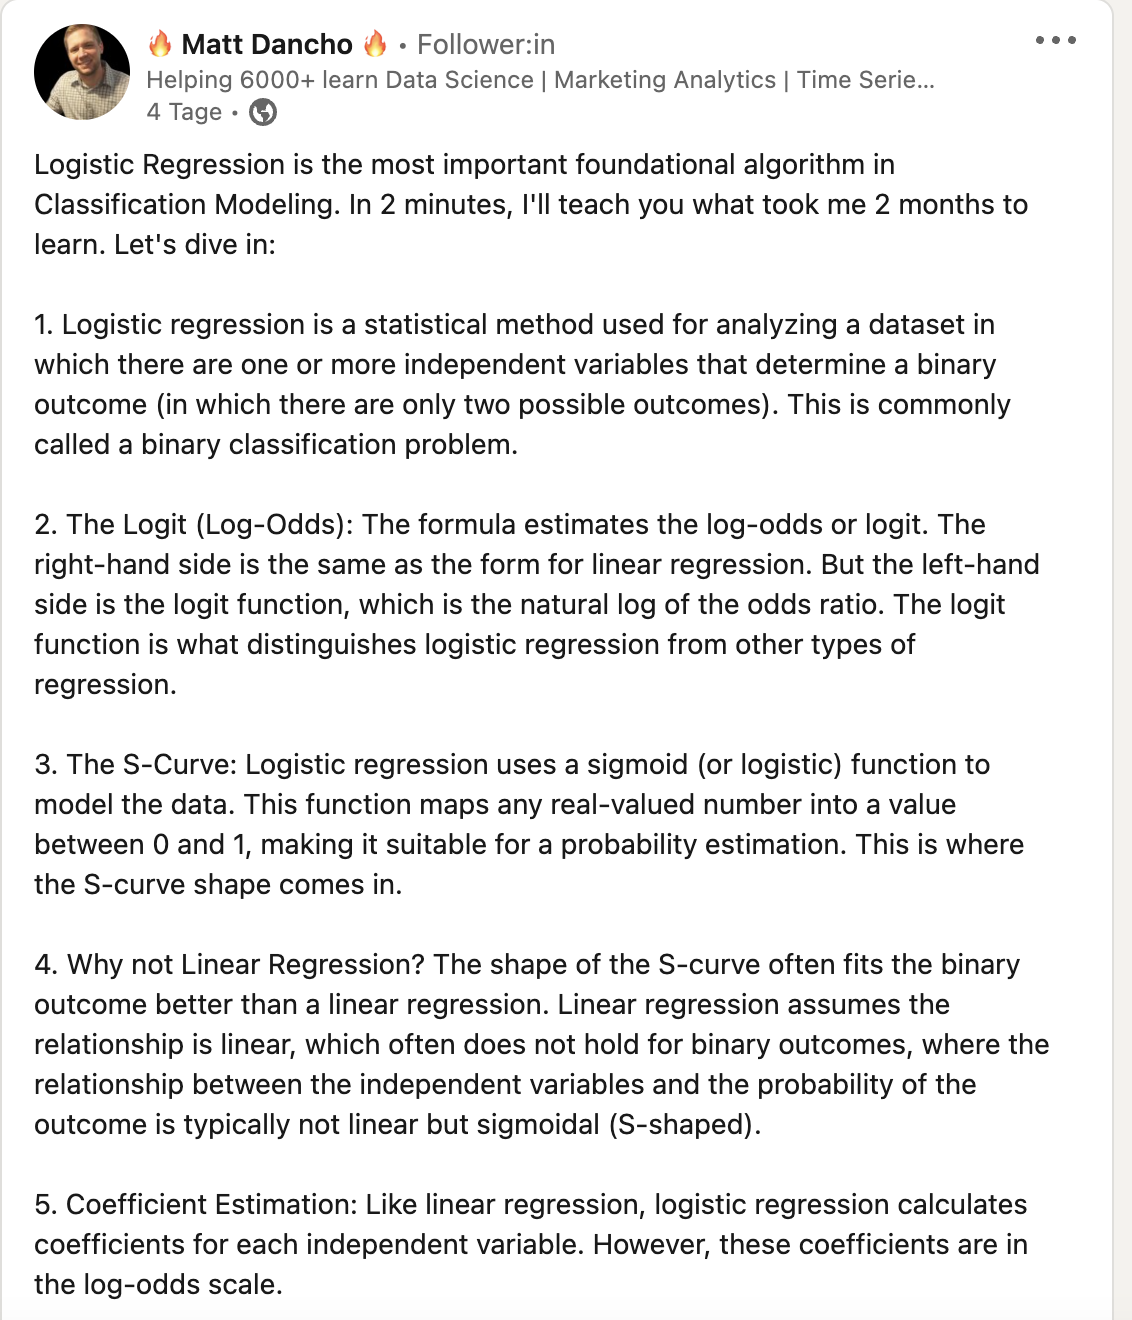

In [7]:
Image('../images/Matt_Dancho.png', width=500)

### GLMNET
In der statistischen Programmiersprache R gibt es eine library die 'glmnet' genannt ist. Dieses Packet implementiert das ElasticNet für das Verallgemeinerte Lineare Modell und nicht nur für die klassische Lineare Regression.<br>
https://web.stanford.edu/~hastie/glmnet/glmnet_alpha.html

Es gibt auch ein python package welches den exakt gleichen Fortran-Code verwendet: __glmnet-python__.<br>
Es gibt ein paar kleine Unterschiede zu der Version von ElasticNet wie sie in `scikit-learn` implementiert ist
https://pypi.org/project/glmnet-python/

# Neural Network
Es ist auch möglich Neuronale Netzwerke unter dem Blickwinkel der Linearen Regression zu betrachten. Ein Netzwerk mit nur einer Eingabe-Schicht und einem Neuron wird als Perceptron bezeichnet. Die Aktivierungs-Funktion dieses Neurons ist entweder die Identitäts-Funktion, so wie in der klassischen Linearen Regression oder die Logistische Funktion wie in der Logistischen Regression. In letzterem Fall soll das Perceptron Wahrscheinlichkeiten für binäre Ereignisse bestimmen.

In [39]:
# Image('../images/Regression_as_NN.png')

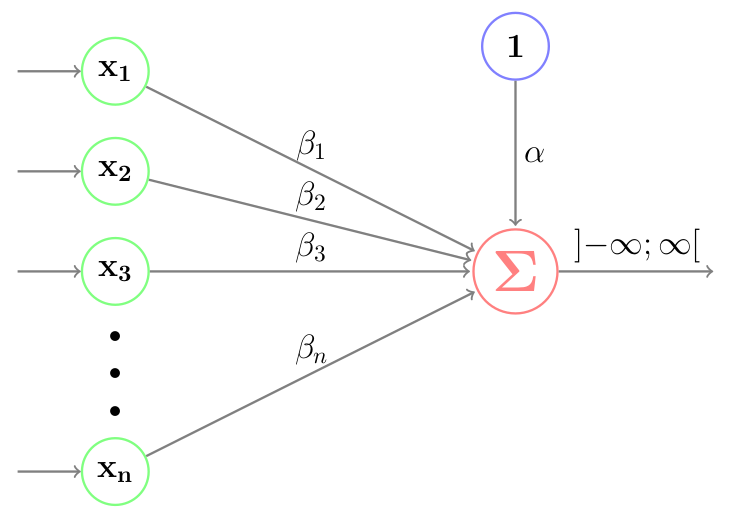

In [40]:
Image("../images/NN_class_reg.png",height=520, width=520)

## classical linear regression
Im Jargon der neural network community werden unsere $b$-Koeffizienten als __Gewichte__ bezeichnet. Der intercept $\alpha$ heisst __bias__.<br>
Erinnert Euch, dass wir den intercept $\alpha$ in den Vektor $\pmb{\beta}$ der $b$-Koeffizienten aufgenomen haben, indem wir eine Einser-Spalte in die Variablen-Matrix $\mathbf{X}$ eingefügt haben. Wir konnten also Schreiben:

\begin{equation*}\mathbf{y} = \mathbf{X} \pmb{\beta}\end{equation*}

In der obigen Graphik könnt ihr sehen, dass im Perceptron die Input-Variablen mit den Gewichten der Verbindungen multipliziert werden und dass der konstante Wert $\alpha$ hinzu addiert wird. Wie in der Linearen Regression werden diese Produkte dann aufsummiert.

Im Kontext Neuronaler Netzwerke wird der Vektor $\pmb{\beta}$ als Netzwerk-Gewichte bezeichnet und wird mit $\mathbf{W}$ angegeben. Wir hatten gelernt, dass Vektoren mit kleinen Buchstaben bezeichnet werden. In einem richtigen Neuronalen Netz haben wir in einer Schicht viel Perceptrons nebeneinander. Alle erhalten aber den Input aus der darunter liegenden Schicht. Fügt man die Gewichts-Vektoren der einzelnen Neurone in eine Matrix zusammen, erhält man $\mathbf{W}$.<br>
Neuronale Netzwerke sind also eigentlich nur viele parallele und hintereinander geschaltete Regressionen, die sehr effizient mit Matrizen-Multiplikation gerechnet werden können.

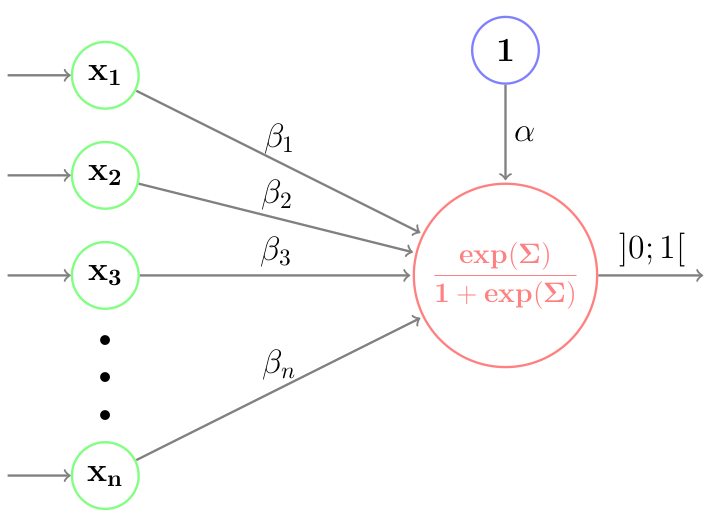

In [41]:
Image("../images/NN_logistic_reg.png", height=520, width=520)

## logistic regression

Für die logistische Aktivierungs-Funktion schreiben wir:
\begin{equation*}
P(y=1 |x) = \frac{\exp(a + b_{1}x_1 + \ldots + b_jx_j)}{1 + \exp(a + b_{1}x_1 + \ldots + b_jx_j)}
\end{equation*}

Diese Funktion nähert sich asymptotisch der $0$ für sehr kleinen Werte und der $1$ für sehr grosse Werte.

### Weight decay

In der Literatur zu Neuronalen Netzwerken wird der $l_2$ Strafterm als "weight decay" bezeichnet.
Dieser Strafterm ist Teil des optimizers und nicht der einzelnen Neurone. Wie auch für Ridge Regression wird weight in die Fehler-Funktion mit aufgenommen:
\begin{equation*}
L' = L + \lambda\sum_i w_i^2, 
\end{equation*}
mit $L$ als Loss (oder Fehler) und den $w_i$ als die Gewichte der eingehenden Verbindungen der Neurone.